**СБОРНЫЙ ПРОЕКТ "Аналитические исследования интернет-магазина «Стримчик»"**

**ОПИСАНИЕ ПРОЕКТА**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Мы имеем данные до 2016 года. Предположим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируруем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Задачи:**

- Проследить изменение числа выпущенных игр по годам.

- Изучить изменение продаж по платформам.

- Выбрать актуальный период, чтобы использовать его для прогнозирования продаж.

- Определить лидирующие платформы по продажам, а также выявить несколько потенциально прибыльных платфоррм.

- Построить график "ящик с усами" для глобальных продаж игр.

- Изучить влияние отзывов пользователей и критиков на продажи внутри одной платформы.

- Изучить общее распределение игр по жанрам.

- Кроме того, я составлю портрет пользователя для каждого региона (North America, Europe, Japan), включая:

- Самые популярные платформы (топ-5) и описание различий в долях продаж.

- Самые популярные жанры (топ-5) и объяснение разницы.

- Исследование влияния рейтинга ESRB на продажи.

**Проверка гипотез:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



**ПОСЛЕДОВАТЕЛЬНОСТЬ ВЫПОЛНЕНИЯ ПРОЕКТА**

1. Загрузка данных и библиотек
2. Подготовка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя для каждого региона
5. Проверка гипотез
6. Общий вывод по проекту

**ОПИСАНИЕ ДАННЫХ**


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### 1. Загрузка данных и библиотек

##### 1.1 Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import sqrt
from scipy import stats as st
from scipy.stats import binom
from IPython.display import display
import seaborn as sns
sns.set(palette='plasma')



##### 1.2 Загрузка данных

In [2]:
try:
    data = pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\games.csv')
except:    
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Вывод:**

- В таблице 16715 строк
- 11 колонок
- 2 типа данных - float(6), object(5)
- Есть пропущенные строки

В типах данных есть несоответствие: в колонке year_of_release содержится тип данных float64, user_score очевидно не является типом object. Есть пропуски в year_of_release, critic_score, user_score, rating. В названии столбцов используются заглавные буквы, необходимо привести к нижнему регистру

#### 2. Подготовка данных

##### 2.1 Замена названия столбцов (приведите к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### 2.2 Работа с пропусками

######  Столбец 'year_of_release'

In [6]:
## Удалим пропущенные значения в 'year_of_release', т. к. их немного
data['year_of_release'].isna().sum()

269

In [7]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'].isna().sum()

0

In [8]:
## Изменим тип данных'year_of_release' на float
data['year_of_release'] = data['year_of_release'].astype('int64')

######  Столбец 'critic_score'

In [9]:
## Пропуски в 'critic_score' оставим без изменений, т. к. это может повлиять на дальнейший анализ, тип данных оставляем float
data['critic_score'].isna().sum()

8463

In [10]:
data['critic_score'].value_counts()

critic_score
70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: count, Length: 81, dtype: int64

######  Столбец 'user_score'

In [11]:
## Пропуски в 'user_score' оставим без изменений, т. к. это может повлиять на дальнейший анализ
data['user_score'].isna().sum()

6607

In [12]:
## Заменим значение tdb (To Be Determined, то есть "Будет определено") на 'NaN'
data['user_score'].value_counts()

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float')

In [14]:
##  тип данных меняем на float
data['user_score'] = data['user_score'].astype('float')

In [15]:
data['user_score'].value_counts()

user_score
7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: count, Length: 95, dtype: int64

######  Столбец 'rating'

**Вывод: Пропуски в данном столбце могут быть связаны с тем, что ассоциация, определяющая возрастной рейтинг компьютерных игр до конца не определилась с оценкой. Возможно некоторые игры идут в тестовом режиме**

In [16]:
data['rating'].value_counts()

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [17]:
data['rating'].isna().sum()

6678

In [18]:
# Заменим пропущенные значения на 'no_rating'
data['rating']=data['rating'].fillna('no_rating')
data['rating'].value_counts()

rating
no_rating    6678
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: count, dtype: int64

In [19]:
# Из открытых источников расшифруем категории рейтинга и создадим словарь

ratings = {
    
'E':'Для всех',
'M':'Для взрослых',
'T':'Подросткам',
'E10+':'Для всех от 10 лет и старше', 
'EC':'Для детей младшего возраста',              
'K-A':'Для всех(устаревшее)',             
'AO':'Только для взрослых',              
'RP':'Рейтинг ожидается',   
'no_rating':'Рейтинг отсутствует'    
}


In [20]:
# Добавим столбец с расшифровкой рейтинга

data['rating_descriptions'] = data['rating'].map(ratings)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,Рейтинг отсутствует
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,Рейтинг отсутствует


In [21]:
# Тип данных меняем на категориальный
data['rating']=data['rating'].astype('category')

######  Пропуски в столбцах 'name'  и 'genre' удалим, их мало

In [22]:
data = data.dropna(subset=['name', 'genre'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 16444 non-null  object  
 1   platform             16444 non-null  object  
 2   year_of_release      16444 non-null  int64   
 3   genre                16444 non-null  object  
 4   na_sales             16444 non-null  float64 
 5   eu_sales             16444 non-null  float64 
 6   jp_sales             16444 non-null  float64 
 7   other_sales          16444 non-null  float64 
 8   critic_score         7983 non-null   float64 
 9   user_score           7463 non-null   float64 
 10  rating               16444 non-null  category
 11  rating_descriptions  16444 non-null  object  
dtypes: category(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [24]:
print(data.duplicated().sum())

0


In [25]:
# Проверим дубликаты по срезу ['name', 'platform', 'year_of_release']

data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [26]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 16443 non-null  object  
 1   platform             16443 non-null  object  
 2   year_of_release      16443 non-null  int64   
 3   genre                16443 non-null  object  
 4   na_sales             16443 non-null  float64 
 5   eu_sales             16443 non-null  float64 
 6   jp_sales             16443 non-null  float64 
 7   other_sales          16443 non-null  float64 
 8   critic_score         7982 non-null   float64 
 9   user_score           7462 non-null   float64 
 10  rating               16443 non-null  category
 11  rating_descriptions  16443 non-null  object  
dtypes: category(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод: После обработки данных у нас осталось:**
- 16443 строк
- 11  колонок
- 3 типа данных: category(1), float64(6), object(3), int64(1)
- изменен тип у user_score, rating
- не полностью заполнены строки в critic_score, user_score (вероятно некоторые игры могли быть выпущены до внедрения систем оценок критиков/пользователей/систем рейтинга; некоторые данные могли быть утеряны/техническая ошибка при выгрузке данных)


In [28]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,Рейтинг отсутствует,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,Рейтинг отсутствует,31.38


#### 3. Исследовательский анализ данных

##### 3.1 Посмотрим сколько игр создавалось в разные годы

In [29]:
# Создадим сводную таблиицу по продажам для каждого года
data_year_of_release = data.groupby('year_of_release')['total_sales'].sum().reset_index()

data_year_of_release.tail(10)

,year_of_release,total_sales
27,2007,604.75
28,2008,671.50
29,2009,658.82
30,2010,590.13
31,2011,507.58
32,2012,355.83
33,2013,361.24
34,2014,331.53
35,2015,267.98
36,2016,129.94


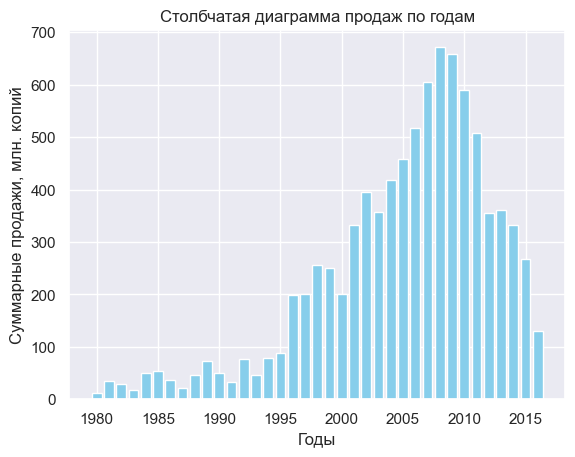

In [30]:
# Построим столбчатую диаграмму продаж по годам

plt.bar(data_year_of_release['year_of_release'], data_year_of_release['total_sales'], color='skyblue')
plt.grid(True)
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Столбчатая диаграмма продаж по годам')
plt.show()

Как видно из графика наибольшие продажи игр были в период 2005-2011 годов. В целом период 1995-2015 годы продажи игр имеют нормальлное распределение. За 1980-1995 продажи игр небольшие, но это связано с формированием рынка компьютерных игр.

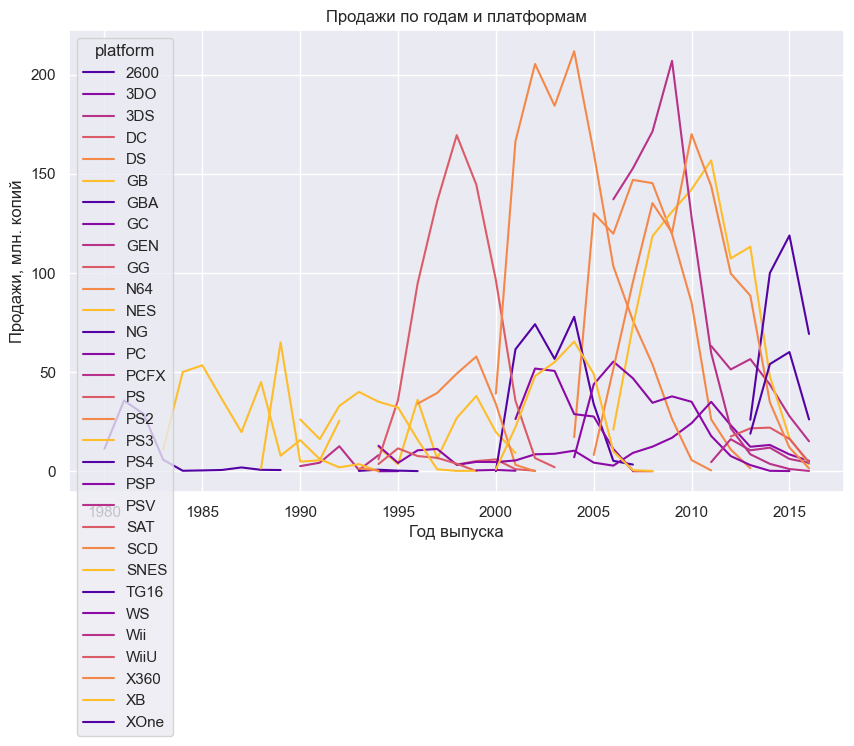

In [31]:
# Создадим сводную таблицу по суммарным продажам по годам в разрезе всех платформ и построим график
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
    .plot(kind='line',figsize=(10, 6), linestyle='-')

plt.title('Продажи по годам и платформам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Год выпуска')
plt.show()


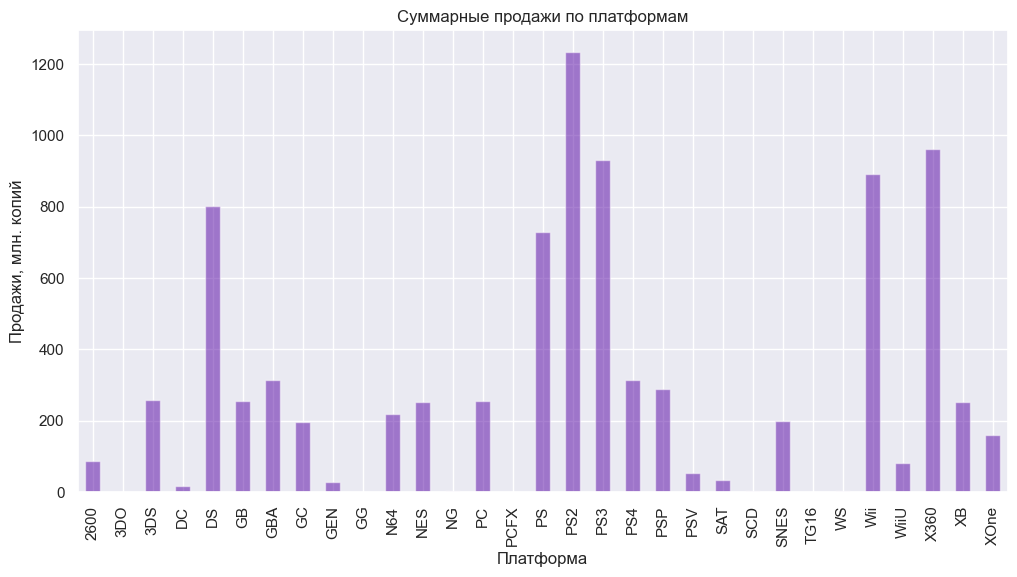

In [32]:
fig, ax = plt.subplots()

(data
 .groupby('platform')['total_sales']
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по платформам')
ax.set_ylabel('Продажи, млн. копий')
ax.set_xlabel('Платформа')
plt.show()

**Определим топ-платформы по продажам игр**

In [33]:
grouped_platforms = (
    data
    .pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum')
    .reset_index()
    .sort_values(by='total_sales', ascending=False)

)
top_platforms = grouped_platforms.head(6)
top_platforms

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58


**Построим график продаж по топ-платформам**

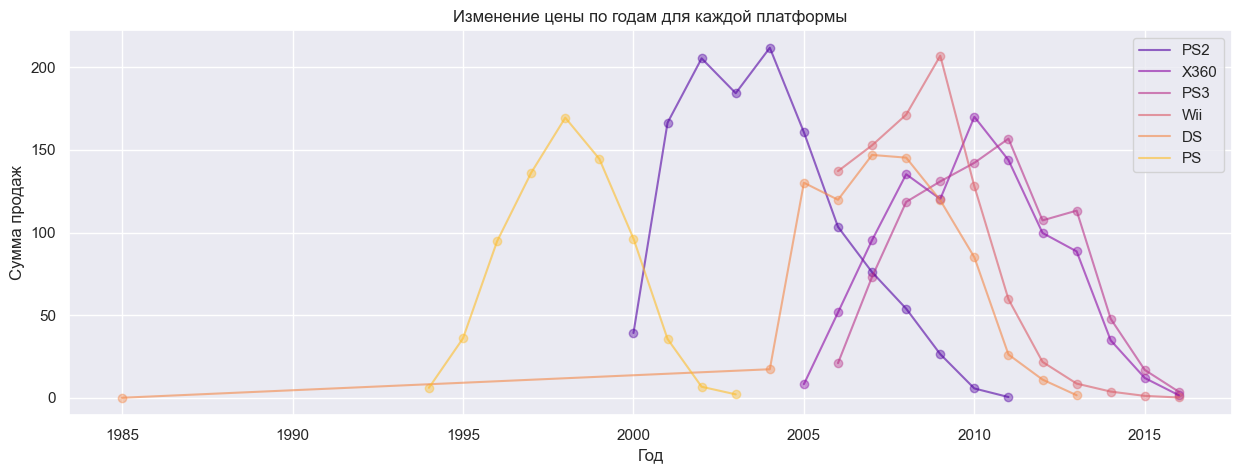

In [34]:
platforms_by_year = data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(15, 5))
# Создаем график
for platform in top_platforms['platform']:
    platform_data = platforms_by_year[platforms_by_year['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform, alpha=0.6)
    plt.scatter(platform_data['year_of_release'], platform_data['total_sales'], alpha=0.4)

# Настройки графика
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.title('Изменение цены по годам для каждой платформы')
plt.legend()

# Показываем график
plt.show()

**Сделаем срез по платформам, которые существуют более 3-х лет**

In [35]:
platform_lifespans = data.groupby('platform')['year_of_release'].agg(['min', 'max'])

platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']
platform_lifespans.head()



,min,max,lifespan
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28


In [36]:
platform_lifespans = platform_lifespans[platform_lifespans['lifespan'] > 3]
platform_lifespans.head() 

,min,max,lifespan
platform,,,
2600,1980,1989,9
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13


**Посчитаем средний срок жизни платформы**

In [37]:
average_lifespan = platform_lifespans['lifespan'].mean()
average_lifespan = round(average_lifespan)
average_lifespan

10

In [38]:
# код ревьюера
data.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

**Вывод: Из графика видно и расчета видно, что средний срок жизни платформ - 10 лет, первые 5 лет продажи растут, остальные 5 лет продажи падают. В качестве актуального периода можно взять 2013-2016 годы**

In [39]:
# Сделаем срез за 2013-2016 годы

data_act = data[data['year_of_release'] >=2013] 
data_act = data_act.sort_values(by='year_of_release', ascending=True)
data_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,Для взрослых,21.05
7790,Fighter Within,XOne,2013,Fighting,0.11,0.07,0.00,0.02,23.0,3.0,T,Подросткам,0.20
7802,Kamen Rider: Battride War,PS3,2013,Action,0.00,0.00,0.19,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.19
7859,Injustice: Gods Among Us,WiiU,2013,Fighting,0.09,0.08,0.00,0.02,82.0,7.9,T,Подросткам,0.19
7873,Metro: Last Light,PC,2013,Action,0.06,0.11,0.00,0.02,82.0,8.6,M,Для взрослых,0.19


In [40]:
# Сгруппируем продажи по платформам и продажам для данного среза
data_act.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(7) 

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
Name: total_sales, dtype: float64

In [41]:
# Сделаем срез по топ-7 за актуальный период
top_list = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PS', 'PC']
data_top = data_act[data_act['platform'].isin(top_list)]
data_top.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,Для взрослых,21.05
7790,Fighter Within,XOne,2013,Fighting,0.11,0.07,0.00,0.02,23.0,3.0,T,Подросткам,0.20
7802,Kamen Rider: Battride War,PS3,2013,Action,0.00,0.00,0.19,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.19
7859,Injustice: Gods Among Us,WiiU,2013,Fighting,0.09,0.08,0.00,0.02,82.0,7.9,T,Подросткам,0.19
7873,Metro: Last Light,PC,2013,Action,0.06,0.11,0.00,0.02,82.0,8.6,M,Для взрослых,0.19
7876,Resident Evil: Revelations,WiiU,2013,Action,0.07,0.07,0.03,0.01,80.0,7.5,M,Для взрослых,0.18
7886,Taiko no Tatsujin: Wii U Version!,WiiU,2013,Misc,0.00,0.00,0.19,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.19
7896,Nobunaga no Yabou: Souzou,PS3,2013,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.19
7915,Tom Clancy's Splinter Cell: Blacklist,PC,2013,Action,0.04,0.13,0.00,0.01,82.0,7.4,M,Для взрослых,0.18
7923,Kuma-Tomo,3DS,2013,Misc,0.00,0.00,0.19,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.19


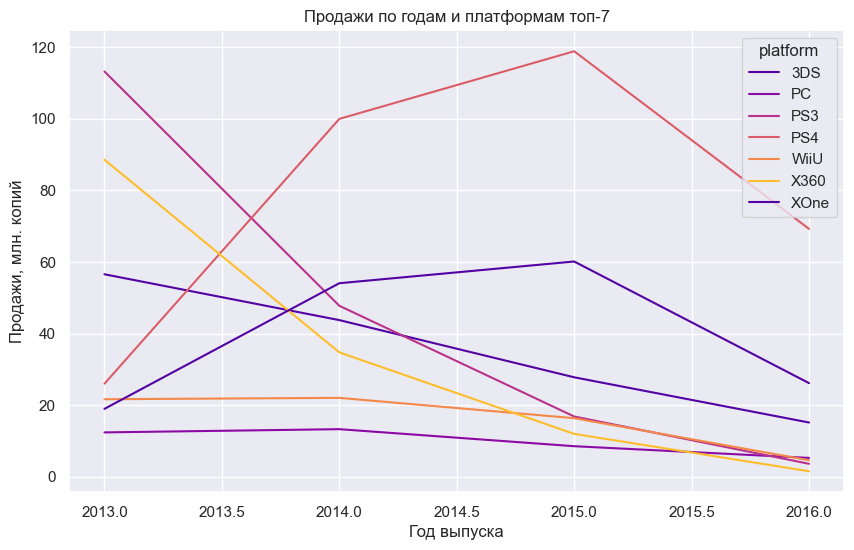

In [42]:
# Создадим сводные таблицы по продажам для топ-7 и построим график
data_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
    .plot(kind='line', figsize=(10, 6), linestyle='-')
plt.title('Продажи по годам и платформам топ-7')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Год выпуска')
plt.show()

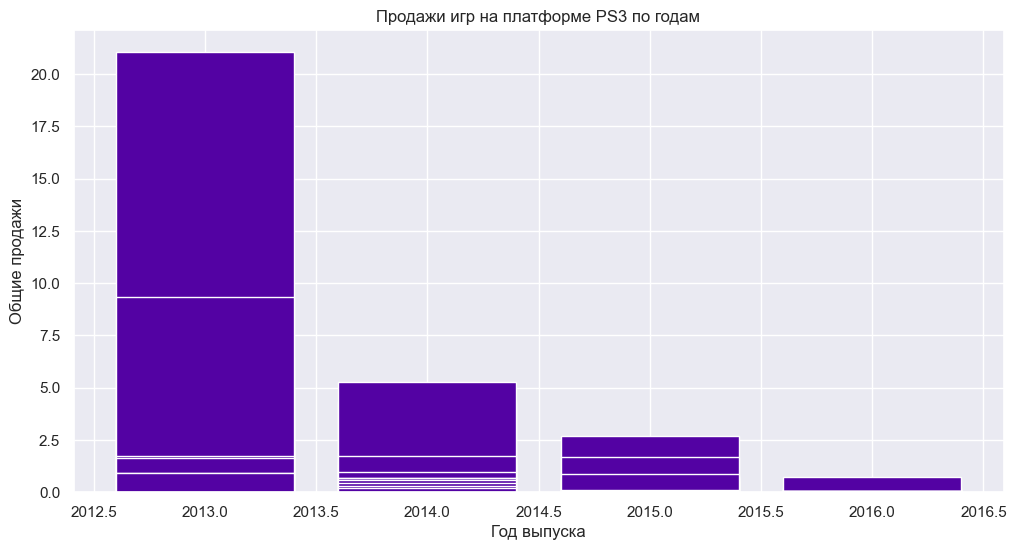

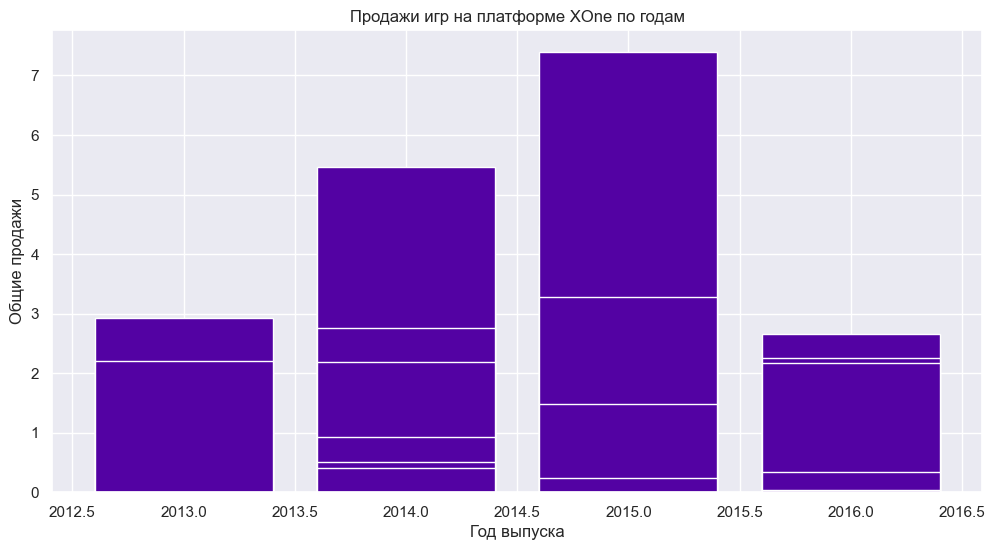

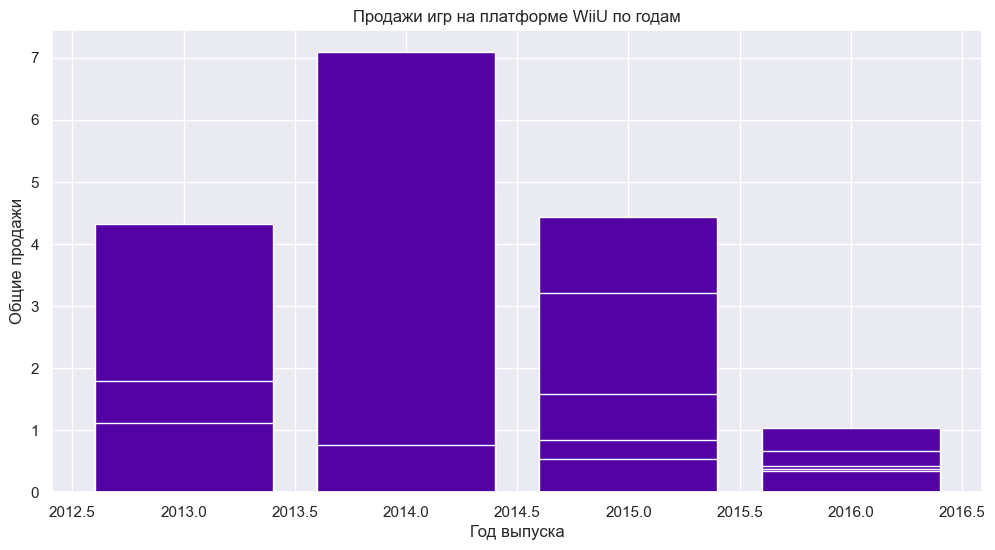

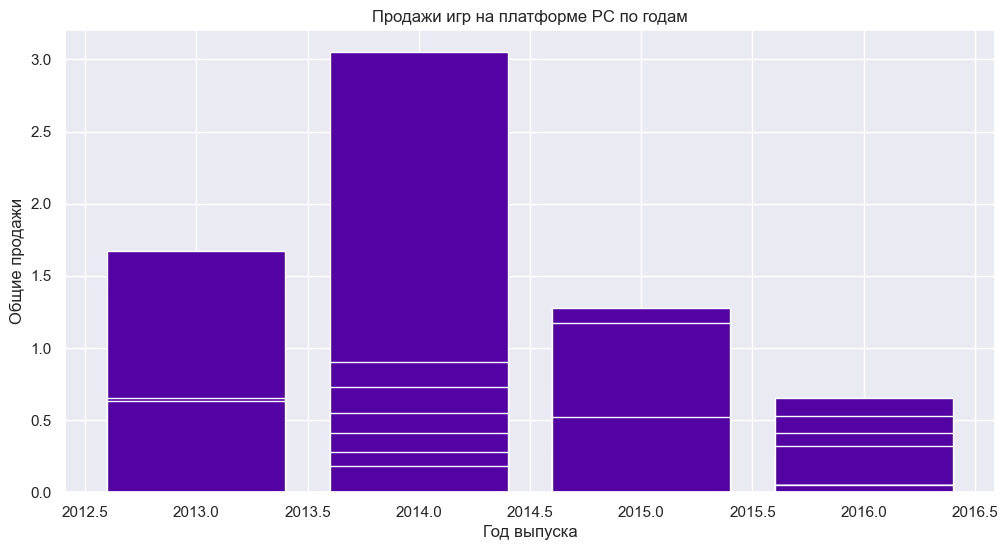

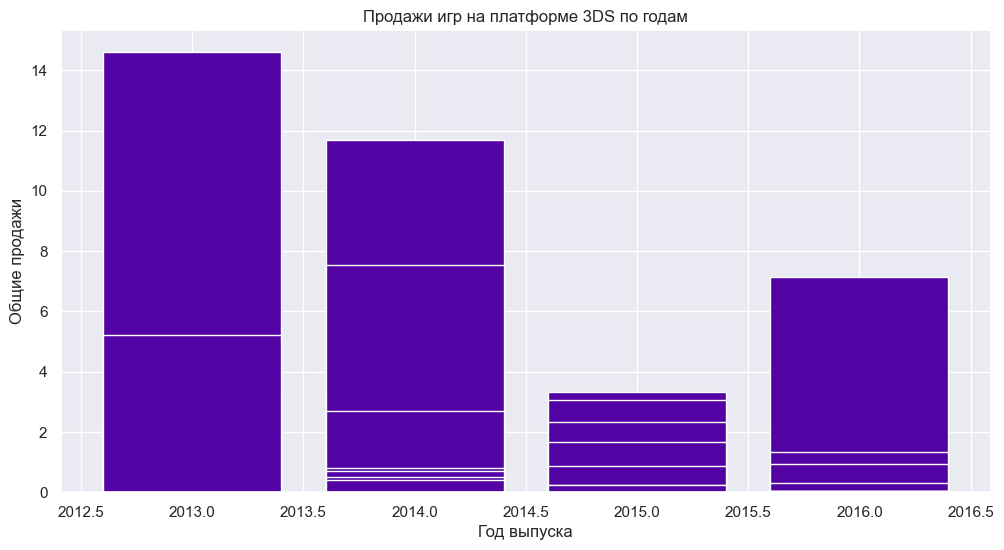

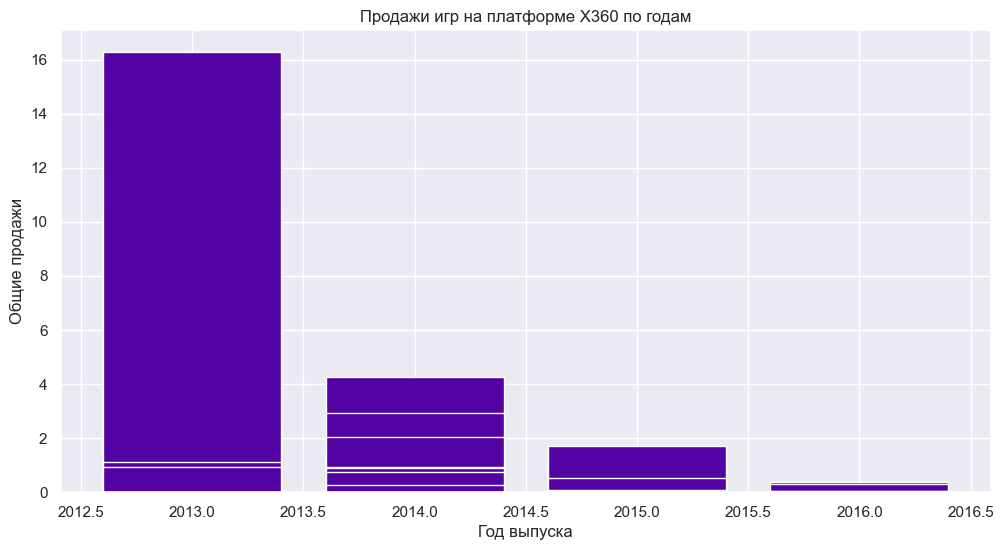

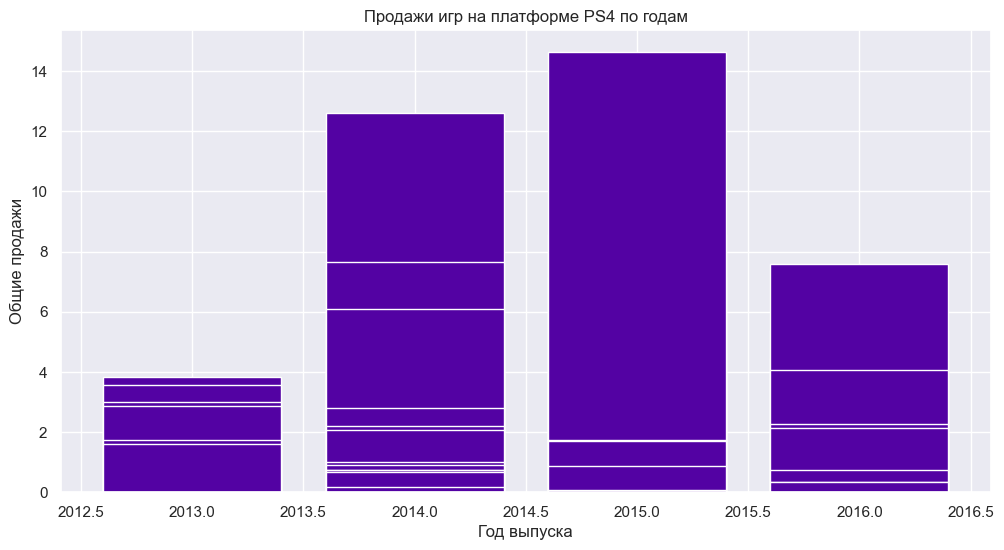

In [43]:

# Создадим цикл для топ-платформ и посмотрим динамику продаж за актуальный период

for platform_name in data_top['platform'].unique():
    
    # Делаем срез для каждой платформы
    
    data_bar = data_top.query('platform == @platform_name')
    plt.figure(figsize=(12, 6))
    plt.bar(data_bar['year_of_release'], data_bar['total_sales'])
    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи')
    plt.title(f'Продажи игр на платформе {platform_name} по годам')
    plt.grid(True)
    plt.show()        
    


**Из диаграмм и графика видно:**
- платформы PS-4 и XOne растут, в 2016 году они немнго падают, но  за 2016 год данные неполные, поэтому может предположить, что и в 2016 году будет рост
- PS-3 и X360 резко падают, вероятно роста больше не будет
- 3DS, WiiU, PC плавно падают, но возможно в 2016 году будет небольшой рост

In [44]:
data_top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1777 entries, 16 to 13384
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 1777 non-null   object  
 1   platform             1777 non-null   object  
 2   year_of_release      1777 non-null   int64   
 3   genre                1777 non-null   object  
 4   na_sales             1777 non-null   float64 
 5   eu_sales             1777 non-null   float64 
 6   jp_sales             1777 non-null   float64 
 7   other_sales          1777 non-null   float64 
 8   critic_score         913 non-null    float64 
 9   user_score           1083 non-null   float64 
 10  rating               1777 non-null   category
 11  rating_descriptions  1777 non-null   object  
 12  total_sales          1777 non-null   float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 182.6+ KB


##### 3.3 Построим боксплоты по продажам в разбивке по топ-платформам

In [45]:
# Построим боксплоты по продажам в разбивке по топ-платформам

top_list = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PS', 'PC']

boxplots = []

# Цикл по платформам из top_list
for platform in top_list:
  
    platform_data = data_act[data_act['platform'] == platform]['total_sales']
    
    boxplots.append(platform_data)


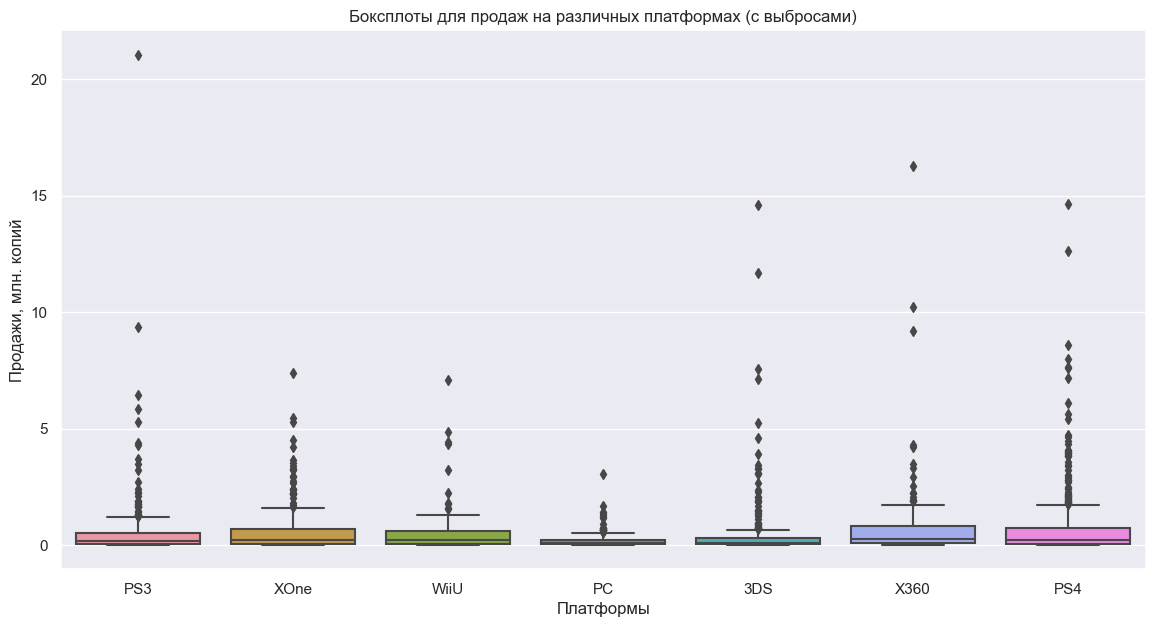

In [46]:

# Построим боксплоты по продажам в разбивке по платформам (с выбросами)
plt.figure(figsize=(14, 7))
sns.boxplot(x='platform', y='total_sales', data=data_act[data_act['platform'].isin(top_list)])
plt.title('Боксплоты для продаж на различных платформах (с выбросами)')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн. копий')
plt.show()

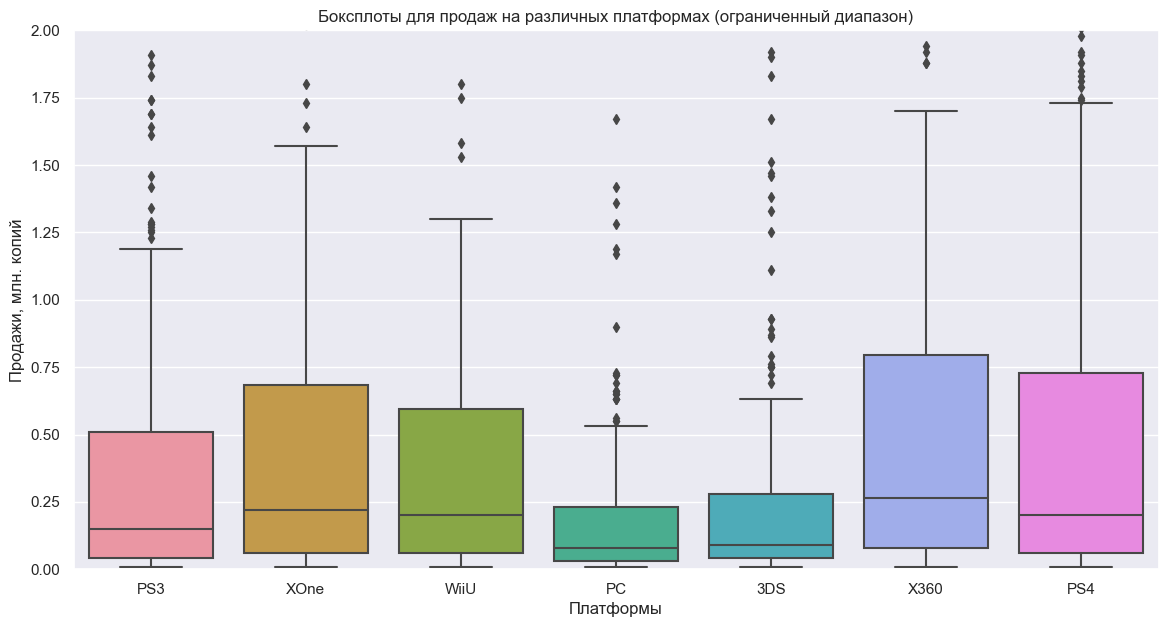

In [47]:
# Построим боксплоты с ограничением диапазона по оси y
plt.figure(figsize=(14, 7))
sns.boxplot(x='platform', y='total_sales', data=data_act[data_act['platform'].isin(top_list)])
plt.ylim(0, 2)  
plt.title('Боксплоты для продаж на различных платформах (ограниченный диапазон)')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн. копий')
plt.show()

**Вывод: Медианные значения продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с небольшими продажами. Для каждой платформы характерны выбросы, вероятно - это игры, которые стали очень популярны, чем больше выбросов, тем более вероятно, что платформа может выпустить супер популярную игру**

In [48]:
# Посчитаем корреляцию Пирсона между отзывами подьзователей и продажами для платформы PS3

ps3_data = data_act[data_act['platform'] == 'PS3']
correlation = ps3_data['total_sales'].corr(ps3_data['user_score'])
correlation

0.0023944027357566543

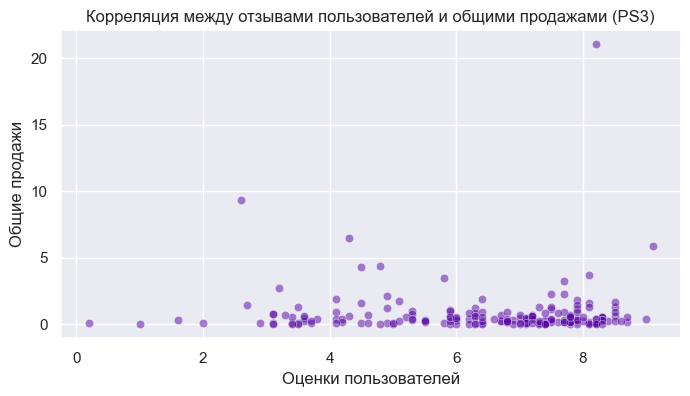

In [49]:
# Построим диаграмму рассеяния
plt.figure(figsize=(8, 4))
sns.scatterplot(x='user_score', y='total_sales', data=ps3_data, alpha=0.5)
plt.title('Корреляция между отзывами пользователей и общими продажами (PS3)')
plt.xlabel('Оценки пользователей')
plt.ylabel('Общие продажи')
plt.show()

**Вывод: В данном случае значение - 0.002 близко к нулю, что говорит о том, что между отзывами пользователей и общими продажами на платформе PS3 практически нет линейной связи. Вероятно, отзывы пользователей не являются сильным фактором общих продаж для данной платформы**

In [50]:
# Посчитаем корреляцию Пирсона между отзывами критиков и продажами для платформы PS3

ps3_data = data_act[data_act['platform'] == 'PS3']
correlation = ps3_data['total_sales'].corr(ps3_data['critic_score'])
correlation

0.3342853393371922

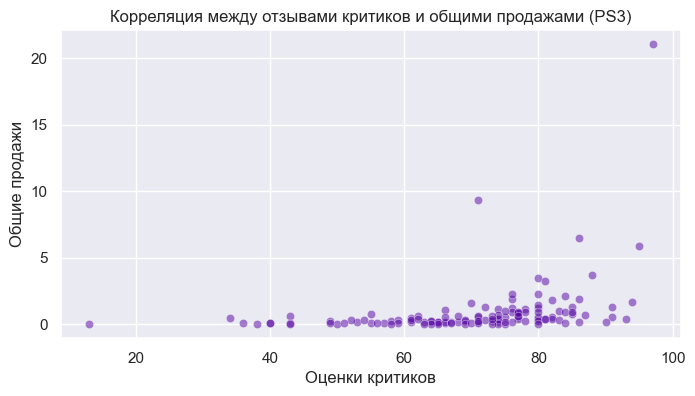

In [51]:
# Построим диаграмму рассеяния для оценки критиков
plt.figure(figsize=(8, 4))
sns.scatterplot(x='critic_score', y='total_sales', data=ps3_data, alpha=0.5)
plt.title('Корреляция между отзывами критиков и общими продажами (PS3)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()



**Вывод: Коэффициент корреляции Пирсона между отзывами пользователей и продажами для платформы PS3 равен 0.33. Этот коэффициент указывает на положительную линейную связь между отзывами пользователей и объемом продаж на платформе PS3. В контексте этой конкретной корреляции:**

- Чем выше оценки пользователей, тем более вероятно, что продажи будут выше.
- Коэффициент 0.33 не является очень сильным, но он указывает на наличие положительной связи между переменными.

In [52]:
# Создадим цикл для расчета корреляции оценки пользователей по всем платформам

for platform_name in data_top['platform'].unique():
    
    # Делаем срез для каждой платформы
    
    data_corr = data_top.query('platform == @platform_name')
    
    # Считаем к-т корреляции
    
    correlation = data_corr['total_sales'].corr(data_corr['user_score'])
    correlation = correlation.round(3)
    print(f"Корреляция между продажами и оценками пользователей для платформы {platform_name}:", correlation)

Корреляция между продажами и оценками пользователей для платформы PS3: 0.002
Корреляция между продажами и оценками пользователей для платформы XOne: -0.069
Корреляция между продажами и оценками пользователей для платформы WiiU: 0.419
Корреляция между продажами и оценками пользователей для платформы PC: -0.094
Корреляция между продажами и оценками пользователей для платформы 3DS: 0.242
Корреляция между продажами и оценками пользователей для платформы X360: -0.012
Корреляция между продажами и оценками пользователей для платформы PS4: -0.032


**Вывод:**

PS3 (Корреляция: 0.002): Наблюдается почти отсутствие корреляции между продажами и оценками пользователей на платформе PS3. Это может указывать на то, что оценки пользователей не имеют значительного влияния на объемы продаж игр для данной платформы.

XOne (Корреляция: -0.069): Существует небольшая отрицательная корреляция между продажами и оценками пользователей для Xbox One (XOne). Это может указывать на то, что, в целом, оценки пользователей не сильно влияют на продажи игр на данной платформе, и наоборот.

WiiU (Корреляция: 0.419): Наблюдается относительно сильная положительная корреляция между продажами и оценками пользователей для Wii U. Это может свидетельствовать о том, что игры с высокими оценками пользователей имеют больший успех среди пользователей Wii U и, возможно, привлекают больше продаж.

PC (Корреляция: -0.094): Существует слабая отрицательная корреляция между продажами и оценками пользователей для платформы PC. Это может говорить о том, что оценки пользователей не являются ключевым фактором влияния на продажи игр на PC.

3DS (Корреляция: 0.242): Наблюдается умеренная положительная корреляция между продажами и оценками пользователей для Nintendo 3DS. Это может указывать на то, что высокие оценки пользователей влияют на увеличение объемов продаж игр на данной платформе.

X360 (Корреляция: -0.012): Корреляция между продажами и оценками пользователей для Xbox 360 близка к нулю, что может указывать на низкое влияние оценок пользователей на продажи игр на данной платформе.

PS4 (Корреляция: -0.032): Также наблюдается небольшая отрицательная корреляция между продажами и оценками пользователей для PlayStation 4 (PS4). Это может говорить о том, что оценки пользователей не являются определяющим фактором для успешных продаж игр на данной платформе.

В целом, можно сделать вывод, что влияние оценок пользователей на объемы продаж может различаться в зависимости от конкретной игровой платформы

[Диаграммы рассеяния](#intro)

In [53]:
# Создадим цикл для расчета корреляции оценки критиков по всем платформам

for platform_name in data_top['platform'].unique():
    
    # Делаем срез для каждой платформы
    
    data_corr = data_top.query('platform == @platform_name')
    
    # Считаем к-т корреляции
    
    correlation = data_corr['total_sales'].corr(data_corr['critic_score'])
    correlation = correlation.round(3)
    print(f"Корреляция между продажами и оценками критиков для платформы {platform_name}:", correlation)

Корреляция между продажами и оценками критиков для платформы PS3: 0.334
Корреляция между продажами и оценками критиков для платформы XOne: 0.417
Корреляция между продажами и оценками критиков для платформы WiiU: 0.376
Корреляция между продажами и оценками критиков для платформы PC: 0.196
Корреляция между продажами и оценками критиков для платформы 3DS: 0.357
Корреляция между продажами и оценками критиков для платформы X360: 0.35
Корреляция между продажами и оценками критиков для платформы PS4: 0.407


**Вывод:**

- PS3 (Корреляция: 0.334): Наблюдается положительная корреляции между продажами и оценками критиков на платформе PS3. Это может указывать на то, что оценки пользователей имеют влияние на объемы продаж игр для данной платформы.

- XOne (Корреляция: 0.417): Наблюдается относительно сильная положительная корреляция между продажами и оценками критиков для Xbox One (XOne). Это может свидетельствовать о том, что игры с высокими оценками критиков имеют больший успех среди пользователей XOne и, возможно, привлекают больше продаж.

- WiiU (Корреляция: 0.376): Наблюдается положительная корреляции между продажами и оценками критиков для платформы для Wii U. Это может свидетельствовать о том, что игры с высокими оценками критиков имеют больший успех среди пользователей Wii U и, возможно, привлекают больше продаж.

- PC (Корреляция: 0.196):  Наблюдается умеренная положительная корреляция между продажами и оценками критиков для платформы PC. Это может указывать на то, что высокие оценки пользователей влияют на увеличение объемов продаж игр на данной платформе.

- 3DS (Корреляция: 0.357): Наблюдается положительная корреляции между продажами и оценками критиков для платформы 3DS. Это может свидетельствовать о том, что игры с высокими оценками критиков имеют больший успех среди пользователей 3DS и, возможно, привлекают больше продаж.

- X360 (Корреляция: 0.35): Наблюдается положительная корреляции между продажами и оценками критиков для платформы X360. Это может свидетельствовать о том, что игры с высокими оценками критиков имеют больший успех среди пользователей X360 и, возможно, привлекают больше продаж.

- PS4 (Корреляция: 0.407): Наблюдается относительно сильная положительная корреляция между продажами и оценками критиков для платформы PS4. Это может свидетельствовать о том, что игры с высокими оценками критиков имеют больший успех среди пользователей PS4 и, возможно, привлекают больше продаж.

**В целом, можно сделать вывод о влияние положительных оценок критиков на увеличение объемов продаж**

**Построим диаграммы рассеяния для платформ по отзывам пользователей**

<a id='intro'></a>

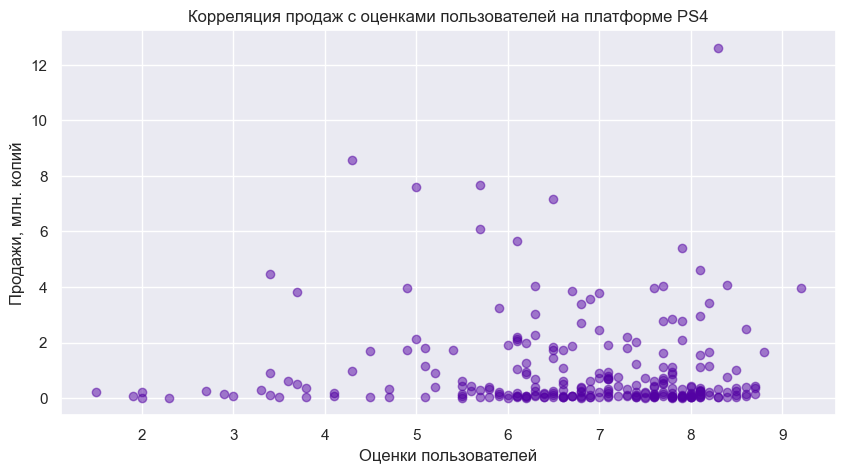

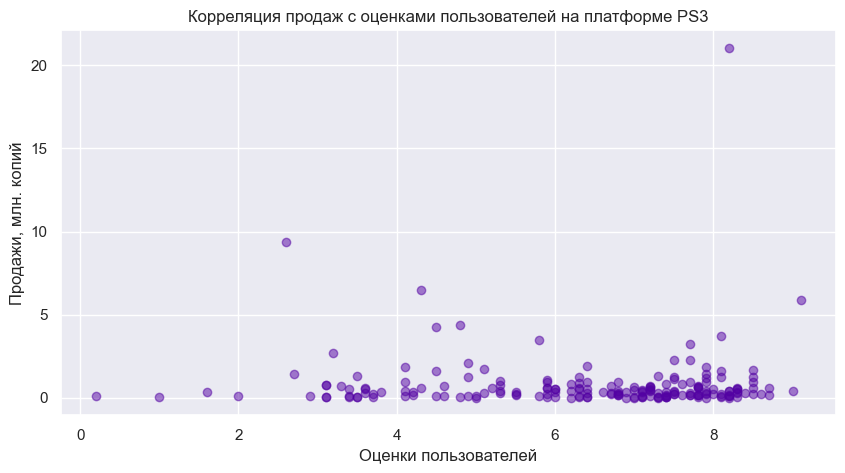

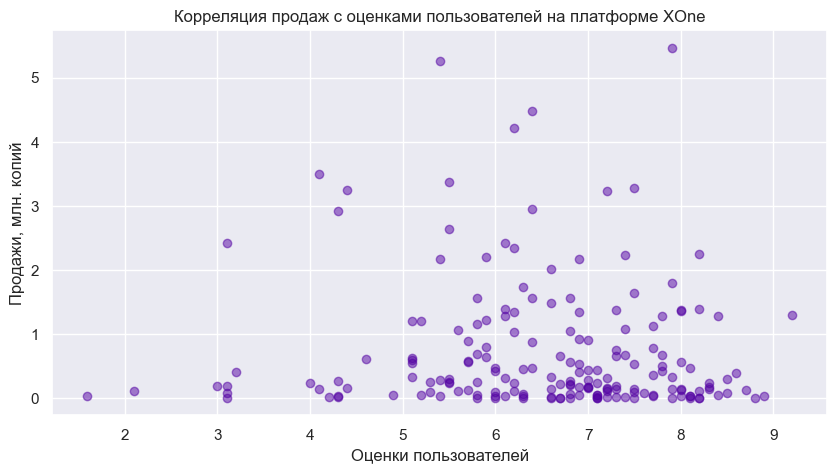

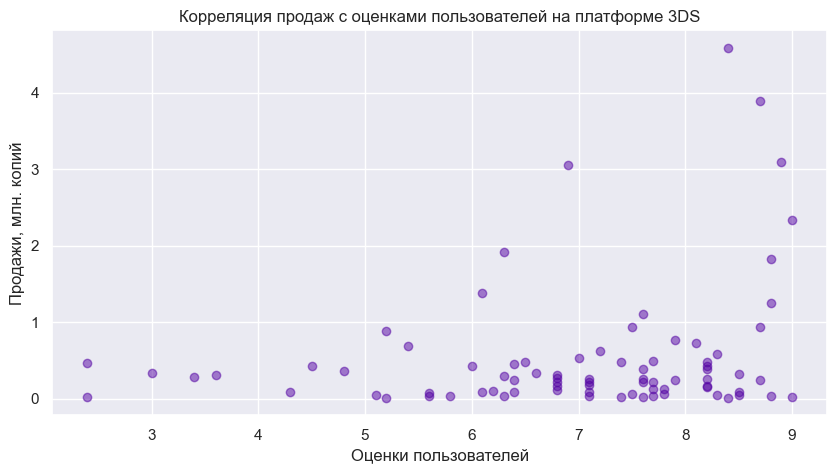

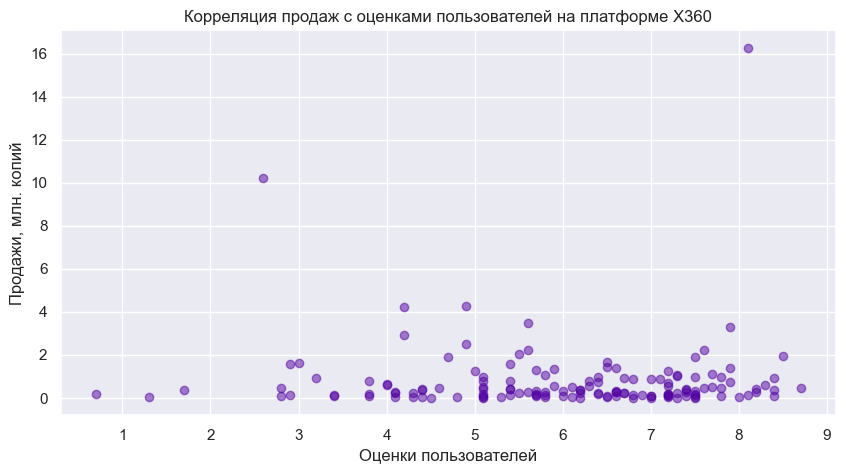

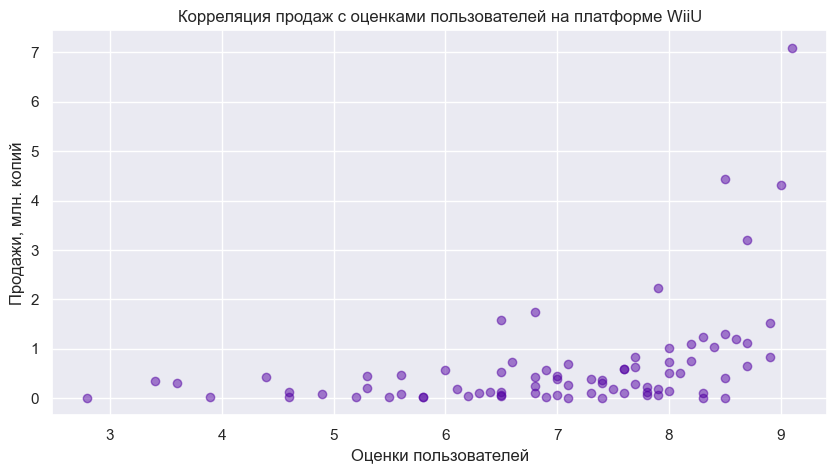

Недостаточно данных для построения графика на платформе PS


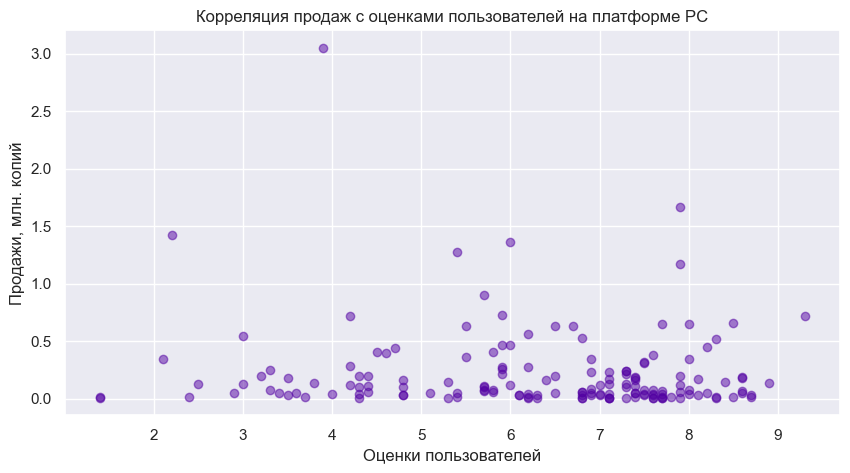

In [54]:
# Цикл по платформам из top_list
for platform in top_list:
  
    platform_data = data_act[data_act['platform'] == platform][['total_sales', 'user_score']]
    
    # Удаление строк с NaN значениями
    platform_data = platform_data.dropna()
    
    # Добавляем проверку на наличие данных
    if not platform_data.empty:
        
        plt.figure(figsize=(10, 5))
        plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5)
        plt.title(f'Корреляция продаж с оценками пользователей на платформе {platform}')
        plt.xlabel('Оценки пользователей')
        plt.ylabel('Продажи, млн. копий')
        plt.show()
    else:
        print(f"Недостаточно данных для построения графика на платформе {platform}")

**Построим диаграммы рассеяния для платформ по оценкам критиков**

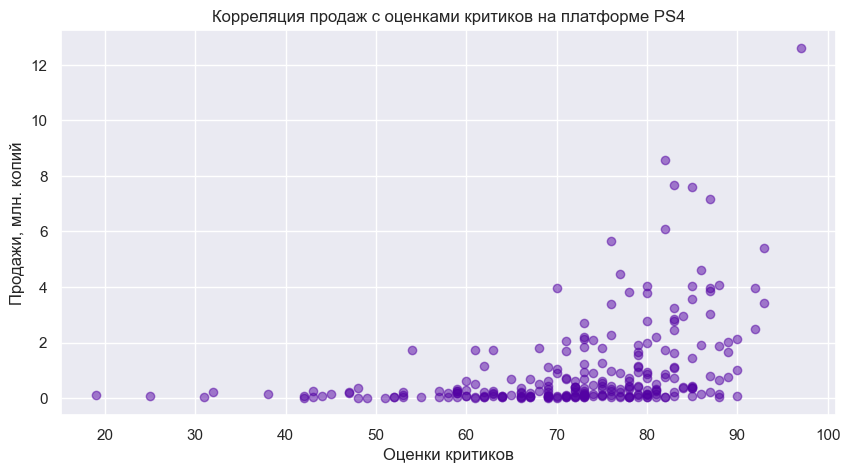

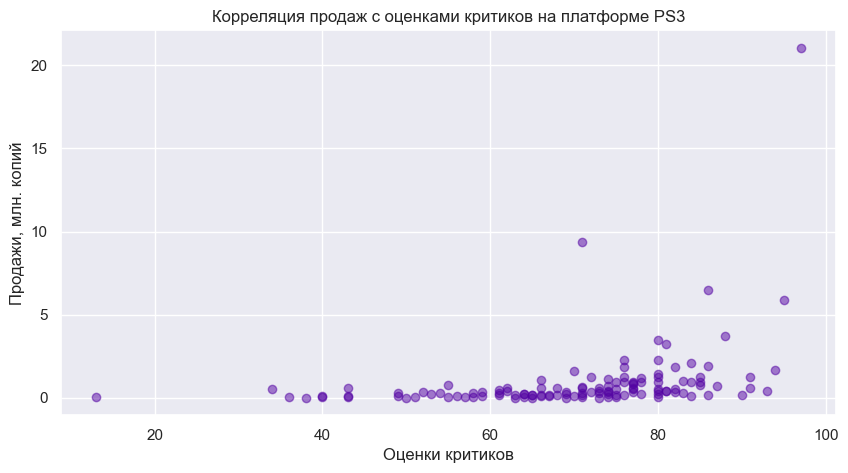

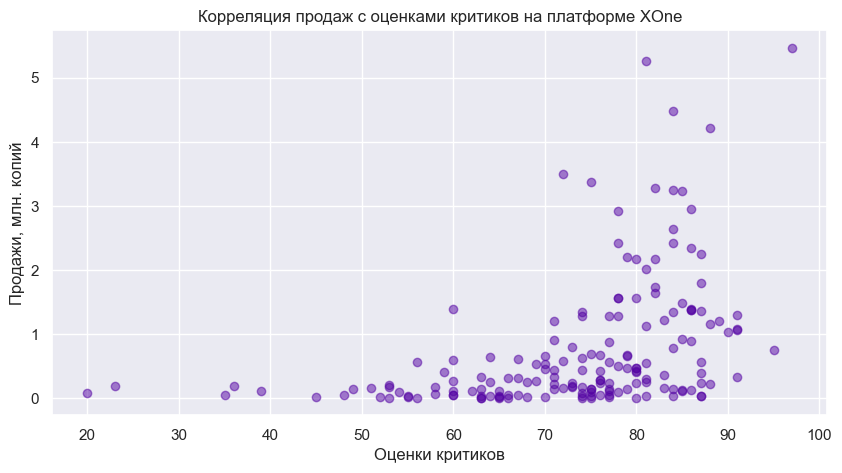

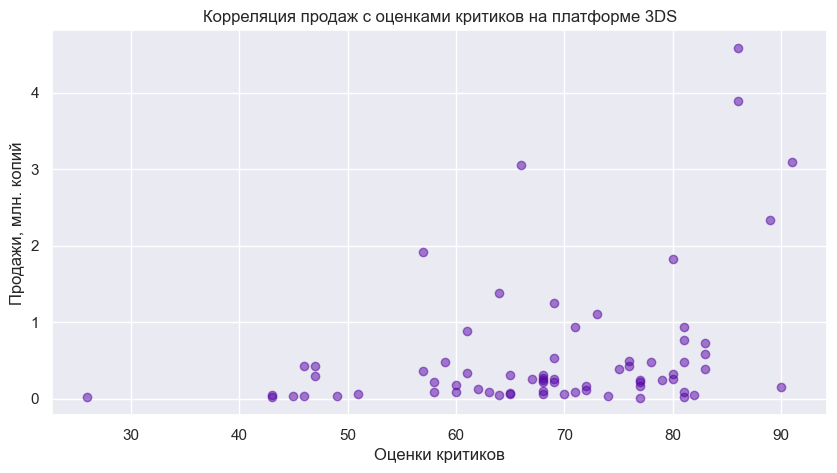

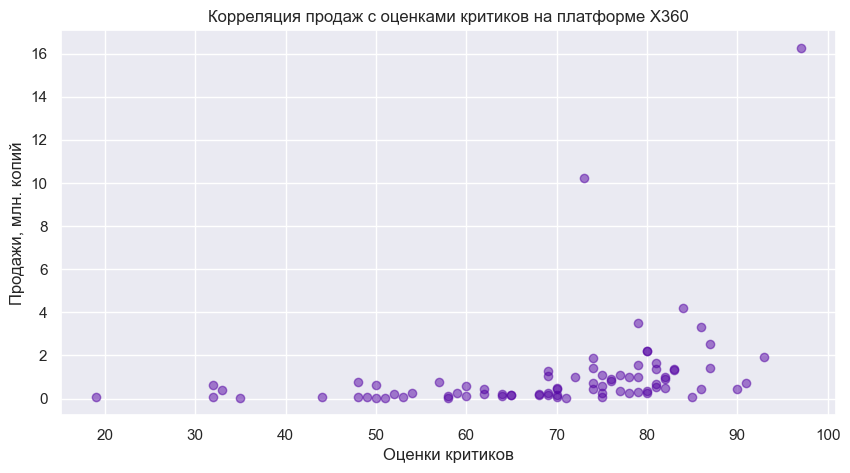

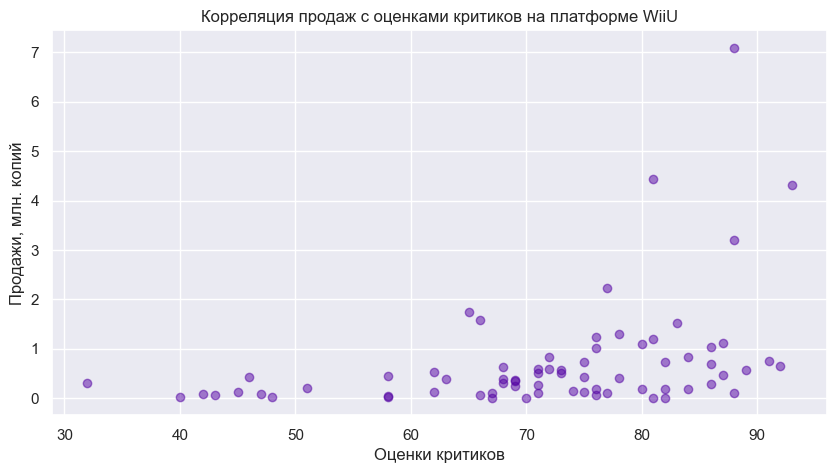

Недостаточно данных для построения графика на платформе PS


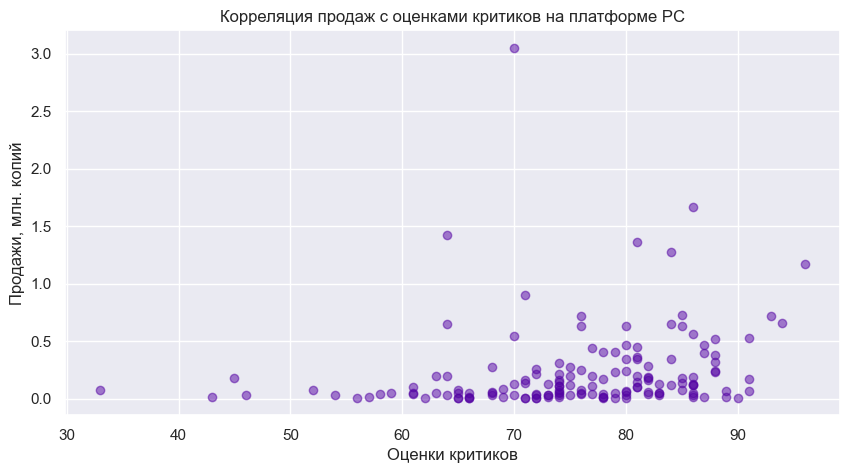

In [55]:
# Цикл по платформам из top_list
for platform in top_list:
  
    platform_data = data_act[data_act['platform'] == platform][['total_sales', 'critic_score']]
    
    # Удаление строк с NaN значениями
    platform_data = platform_data.dropna()
    
    # Добавляем проверку на наличие данных
    if not platform_data.empty:
       
        plt.figure(figsize=(10, 5))
        plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.5)
        plt.title(f'Корреляция продаж с оценками критиков на платформе {platform}')
        plt.xlabel('Оценки критиков')
        plt.ylabel('Продажи, млн. копий')
        plt.show()
    else:
        print(f"Недостаточно данных для построения графика на платформе {platform}")

[Диаграммы рассеяния](#intro)

**Вывод:**
Оценки критиков влияют на продажи больше,чем оценки пользователей, но нельзя сказать что оценки критиков имеют большое влияние на продажи игр.

In [56]:
data_act['genre'].value_counts(ascending=False)


genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: count, dtype: int64

In [57]:
data_act.pivot_table(
    index = 'genre',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='sum',
    margins=True
).fillna(0).sort_values(
    by='All', 
    ascending=False
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
genre,,,,,,,,,,,,
All,143.25,1.54,39.43,181.43,314.14,3.50,32.99,13.66,64.63,136.80,159.32,1090.69
Action,34.04,0.50,7.26,70.92,96.10,0.86,9.72,2.82,14.75,47.59,37.31,321.87
Shooter,0.06,0.00,9.84,31.79,88.56,0.00,1.44,0.00,5.48,35.48,60.33,232.98
Sports,1.82,0.03,1.96,32.35,55.61,0.69,2.08,0.95,2.46,25.96,26.74,150.65
Role-Playing,67.37,0.00,4.87,16.49,28.99,1.03,10.23,0.00,1.93,4.43,10.55,145.89
Misc,7.10,0.08,0.71,8.36,8.19,0.17,3.85,7.06,7.38,12.49,7.43,62.82
Platform,8.79,0.69,0.07,3.33,7.69,0.00,0.47,2.25,16.27,2.14,0.93,42.63
Racing,0.00,0.00,0.97,6.46,12.14,0.00,0.10,0.00,7.36,3.07,9.79,39.89
Fighting,8.21,0.00,0.10,6.05,8.65,0.02,1.19,0.00,6.09,2.55,2.45,35.31


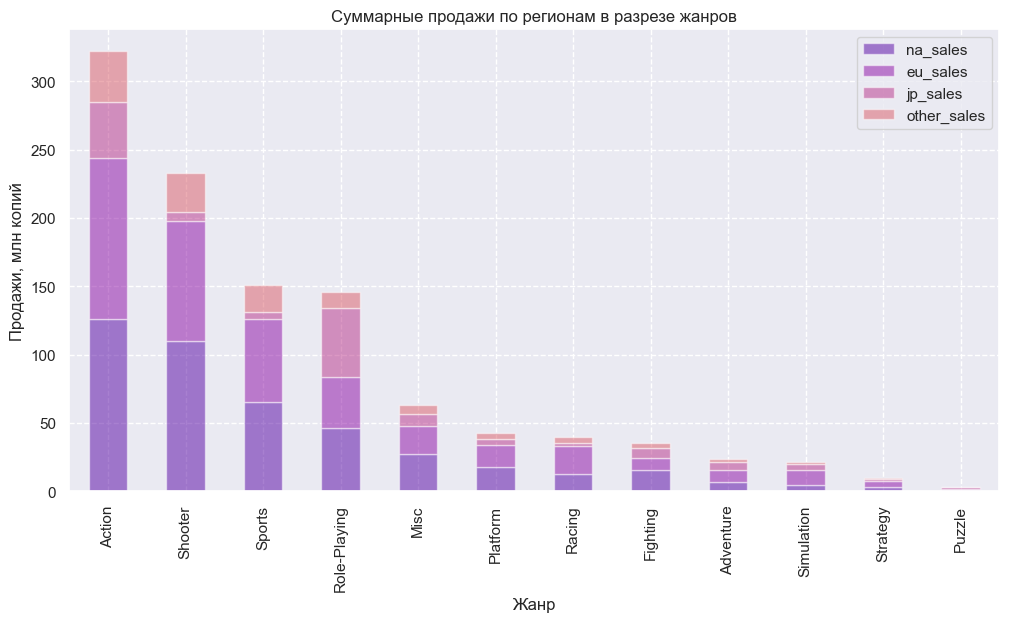

In [58]:
fig, ax = plt.subplots()

sales_sum = data_act.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum()
sorted_genres = sales_sum.sum(axis=1).sort_values(ascending=False).index

sales_sum.loc[sorted_genres].plot(kind='bar', stacked=True, ax=ax, figsize=(12,6), alpha=0.5)

ax.set_title('Суммарные продажи по регионам в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

**Вывод:**  
- на первом месте с лидирующим отрывом Action. Вероятно это жанр имеет наибольшую возрастную и гендерную аудиторию
- на втором месте Sports, Role-Playing и Shooter. Их продажи почти одинаковые. Возможно такой жанр привлекает мужчин, т. к. позволяет примерить на себя роль супер-героя, использовать в игре оружие или победить в спортивном состязании.
- на третьем месте Misc, Platform, Racing, Fighting, Adventure, Simulatio, Strategy. Эти жанры имеют меньшую популярность и более низкие продажи. 
- В конце списка Puzzle, вероятно потому что традиционно пазлы собирают вручную.

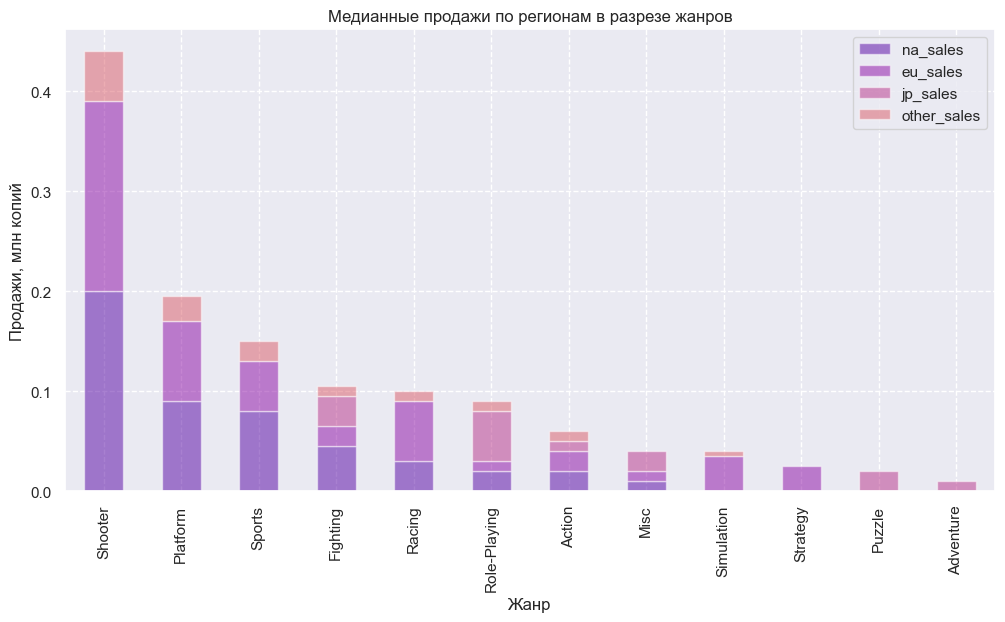

In [59]:
fig, ax = plt.subplots()

sales_sum = data_act.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].median()
sorted_genres = sales_sum.sum(axis=1).sort_values(ascending=False).index

sales_sum.loc[sorted_genres].plot(kind='bar', stacked=True, ax=ax, figsize=(12,6), alpha=0.5)

ax.set_title('Медианные продажи по регионам в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

In [60]:
sales_sum 

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,0.020,0.020,0.01,0.010
Adventure,0.000,0.000,0.01,0.000
Fighting,0.045,0.020,0.03,0.010
Misc,0.010,0.010,0.02,0.000
Platform,0.090,0.080,0.00,0.025
Puzzle,0.000,0.000,0.02,0.000
Racing,0.030,0.060,0.00,0.010
Role-Playing,0.020,0.010,0.05,0.010
Shooter,0.200,0.190,0.00,0.050


In [61]:
sorted_genres

Index(['Shooter', 'Platform', 'Sports', 'Fighting', 'Racing', 'Role-Playing',
       'Action', 'Misc', 'Simulation', 'Strategy', 'Puzzle', 'Adventure'],
      dtype='object', name='genre')

In [62]:
sales_sum.loc[sorted_genres]

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Shooter,0.200,0.190,0.00,0.050
Platform,0.090,0.080,0.00,0.025
Sports,0.080,0.050,0.00,0.020
Fighting,0.045,0.020,0.03,0.010
Racing,0.030,0.060,0.00,0.010
Role-Playing,0.020,0.010,0.05,0.010
Action,0.020,0.020,0.01,0.010
Misc,0.010,0.010,0.02,0.000
Simulation,0.000,0.035,0.00,0.005


**Вывод:**

По медианному количеству продаж мы наблюдаем смещение лидеров: теперь на первом месте по продажам - Shooters, а в тройке лидеров появляется жанр Platform. Action выбыл из топ-5.

Такой результат говорит нам о том, что этих жанрах есть игры-хиты с многомиллионными продажами.



#### 4. Портрет пользователя каждого региона

##### 4.1 Самые популярные платформы 

In [63]:
# Посчитаем распределение платформ в регионах
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
platform_regions = data_act.pivot_table(index='platform', values=regions, aggfunc= 'sum')
platform_regions

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,30.96,67.81,38.20,6.28
DS,0.85,0.00,0.57,0.12
PC,25.36,0.00,11.11,2.96
PS3,67.81,23.35,63.50,26.77
PS4,141.09,15.96,108.74,48.35
PSP,0.17,3.29,0.00,0.04
PSV,6.10,18.59,5.04,3.26
Wii,5.93,0.05,6.56,1.12
WiiU,19.85,10.88,29.21,4.69


In [64]:
# Посчитаем распределение платформ в регионях по долям
platform_regions = platform_regions.apply(lambda column :  round(column/column.sum()*100), axis=0)
platform_regions

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,8.0,48.0,9.0,5.0
DS,0.0,0.0,0.0,0.0
PC,6.0,0.0,3.0,2.0
PS3,17.0,17.0,15.0,22.0
PS4,36.0,11.0,25.0,40.0
PSP,0.0,2.0,0.0,0.0
PSV,2.0,13.0,1.0,3.0
Wii,2.0,0.0,1.0,1.0
WiiU,5.0,8.0,7.0,4.0


In [65]:
# Оставляем только топ-5 платформ в каждом регионе
top_platforms_eu = platform_regions.sort_values('eu_sales', ascending=False).head(5)
top_platforms_na = platform_regions.sort_values('na_sales', ascending=False).head(5)
top_platforms_jp = platform_regions.sort_values('jp_sales', ascending=False).head(5)
top_platforms_other = platform_regions.sort_values('other_sales', ascending=False).head(5)

In [66]:
# Объединяем продажи на остальных платформах
other_sales_eu = platform_regions['eu_sales'].sum() - top_platforms_eu['eu_sales'].sum()
other_sales_na = platform_regions['na_sales'].sum() - top_platforms_na['na_sales'].sum()
other_sales_jp = platform_regions['jp_sales'].sum() - top_platforms_jp['jp_sales'].sum()
other_sales_other = platform_regions['other_sales'].sum() - top_platforms_other['other_sales'].sum()

In [67]:
# Создаем новый DataFrame для остальных продаж
other_sales_data = pd.DataFrame({
    'eu_sales': [other_sales_eu],
    'na_sales': [other_sales_na],
    'jp_sales': [other_sales_jp],
    'other_sales': [other_sales_other]
}, index=['Other'])


In [68]:
# Объединяем топ-5 и остальные продажи
top_platforms_eu = pd.concat([top_platforms_eu, other_sales_data])
top_platforms_na = pd.concat([top_platforms_na, other_sales_data])
top_platforms_jp = pd.concat([top_platforms_jp, other_sales_data])
top_platforms_other = pd.concat([top_platforms_other, other_sales_data])


In [69]:
# Задаем цвета для круговых диаграмм
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']


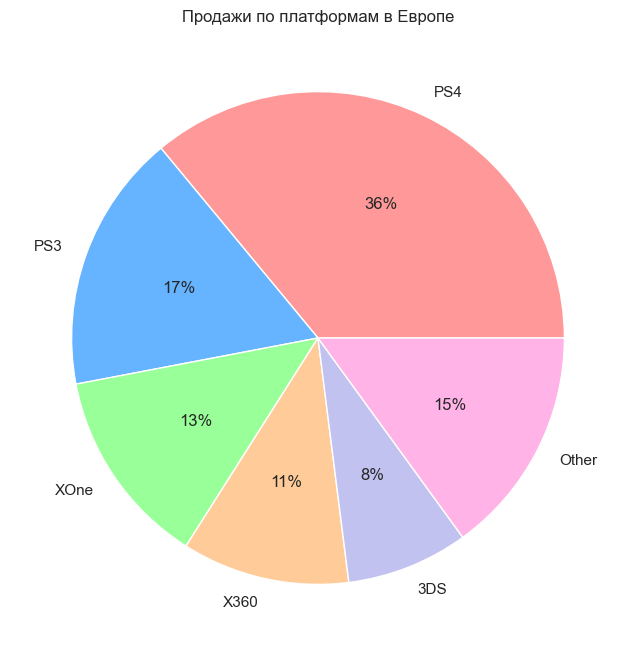

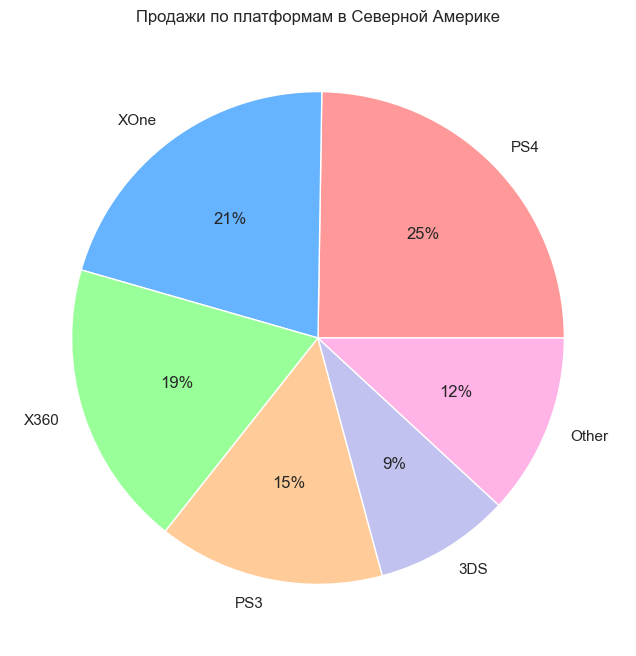

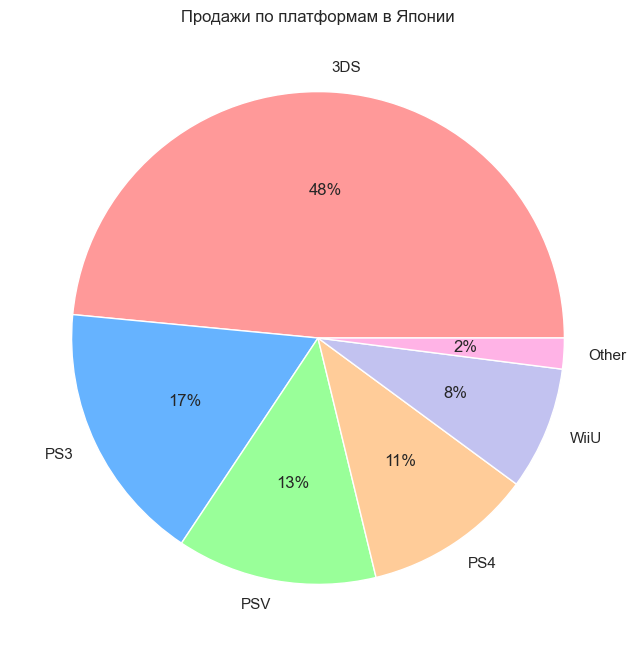

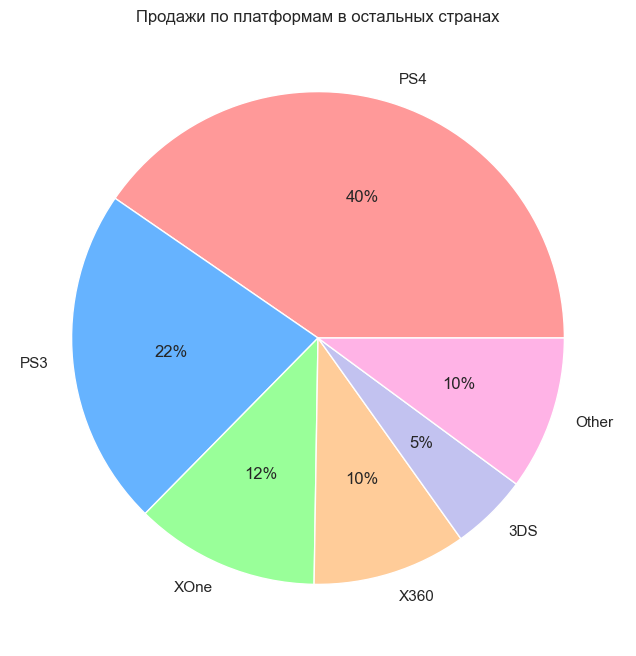

In [70]:
# Построение круговых диаграмм для каждого региона с заданными цветами
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.0f%%', colors=colors)
    plt.title(title)
    plt.show()

plot_pie_chart(top_platforms_eu['eu_sales'], 'Продажи по платформам в Европе')
plot_pie_chart(top_platforms_na['na_sales'], 'Продажи по платформам в Северной Америке')
plot_pie_chart(top_platforms_jp['jp_sales'], 'Продажи по платформам в Японии')
plot_pie_chart(top_platforms_other['other_sales'], 'Продажи по платформам в остальных странах')

**Вывод:**

- европейские и американские пользователи предпочитают PS3, PS4 (PlayStation) и Xbox
- японские предпочитают 3DS (Nintendo)
- в остальных странах также предпочитают PS3, PS4 (PlayStation)

##### 4.2 Самые популярные жанры 

In [71]:
# Посчитаем распределение жанров в регионах
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
genre_regions = data_act.pivot_table(index='genre', values=regions, aggfunc= 'sum')
genre_regions

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,118.13,40.49,126.05,37.20
Adventure,8.25,5.82,7.14,2.43
Fighting,8.55,7.65,15.55,3.56
Misc,20.04,9.20,27.49,6.09
Platform,15.58,4.79,18.14,4.12
Puzzle,1.00,1.18,0.83,0.16
Racing,20.19,2.30,12.96,4.44
Role-Playing,36.97,51.04,46.40,11.48
Shooter,87.86,6.61,109.74,28.77


In [72]:
# Посчитаем доли распределение жанров по долям
genre_regions = genre_regions.apply(lambda column :  round(column/column.sum()*100), axis=0)
genre_regions

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,30.0,29.0,29.0,31.0
Adventure,2.0,4.0,2.0,2.0
Fighting,2.0,5.0,4.0,3.0
Misc,5.0,7.0,6.0,5.0
Platform,4.0,3.0,4.0,3.0
Puzzle,0.0,1.0,0.0,0.0
Racing,5.0,2.0,3.0,4.0
Role-Playing,9.0,36.0,11.0,10.0
Shooter,22.0,5.0,25.0,24.0


In [73]:
# Ограничимся топ-6 жанрами для каждого региона
top_genres_eu = genre_regions.sort_values('eu_sales', ascending=False).head(6)
top_genres_na = genre_regions.sort_values('na_sales', ascending=False).head(6)
top_genres_jp = genre_regions.sort_values('jp_sales', ascending=False).head(6)
top_genres_other = genre_regions.sort_values('other_sales', ascending=False).head(6)


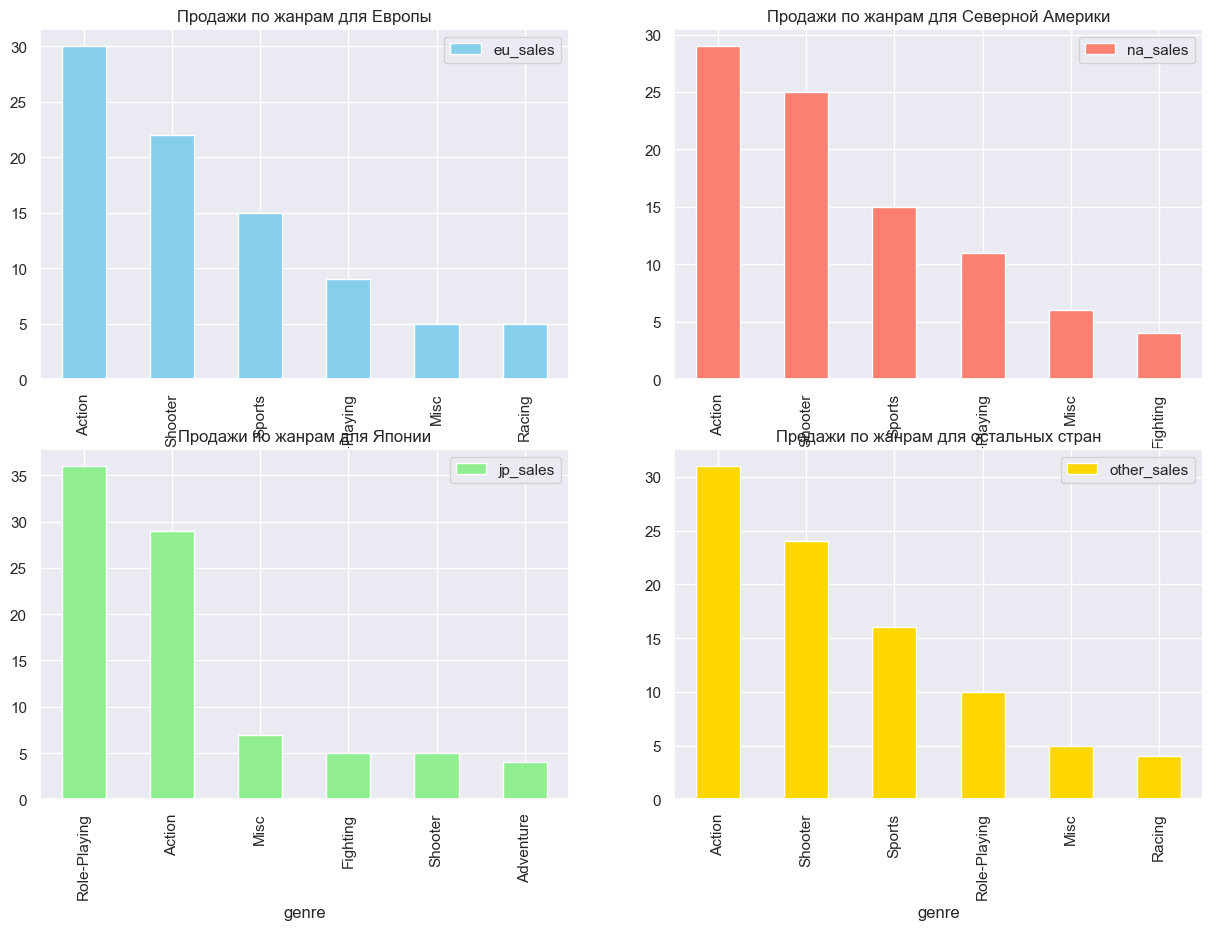

In [74]:
# Создадим поддиаграммы (subplots) в виде матрицы 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Построим столбчатые диаграммы для каждого региона
top_genres_eu.plot(kind='bar', y='eu_sales', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Продажи по жанрам для Европы')

top_genres_na.plot(kind='bar', y='na_sales', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Продажи по жанрам для Северной Америки')

top_genres_jp.plot(kind='bar', y='jp_sales', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Продажи по жанрам для Японии')

top_genres_other.plot(kind='bar', y='other_sales', ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Продажи по жанрам для остальных стран')

plt.show()

**Вывод:**
- Европа, Америка и другие страны кроме Японии предпочитают Action, Sports и Shooter
- Япония предпочитает Role-Playing и Action

 Вероятно такие предпочтения связаны с особенностью культуры и менталитета

##### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [75]:
# Посчитаем распределение рейтинга в регионах
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
rating_regions = data_act.pivot_table(index='rating_descriptions', values=regions, aggfunc= 'sum')
rating_regions

,eu_sales,jp_sales,na_sales,other_sales
rating_descriptions,,,,
Для взрослых,145.32,14.11,165.21,47.04
Для всех,83.36,15.14,79.05,22.61
Для всех от 10 лет и старше,42.69,5.89,54.24,12.57
Подросткам,41.95,20.59,49.79,14.29
Рейтинг отсутствует,78.91,85.05,89.42,23.46


In [76]:
# Посчитаем доли распределение рейтинга по долям
rating_regions = rating_regions.apply(lambda column :  round(column/column.sum()*100), axis=0)
rating_regions

,eu_sales,jp_sales,na_sales,other_sales
rating_descriptions,,,,
Для взрослых,37.0,10.0,38.0,39.0
Для всех,21.0,11.0,18.0,19.0
Для всех от 10 лет и старше,11.0,4.0,12.0,10.0
Подросткам,11.0,15.0,11.0,12.0
Рейтинг отсутствует,20.0,60.0,20.0,20.0


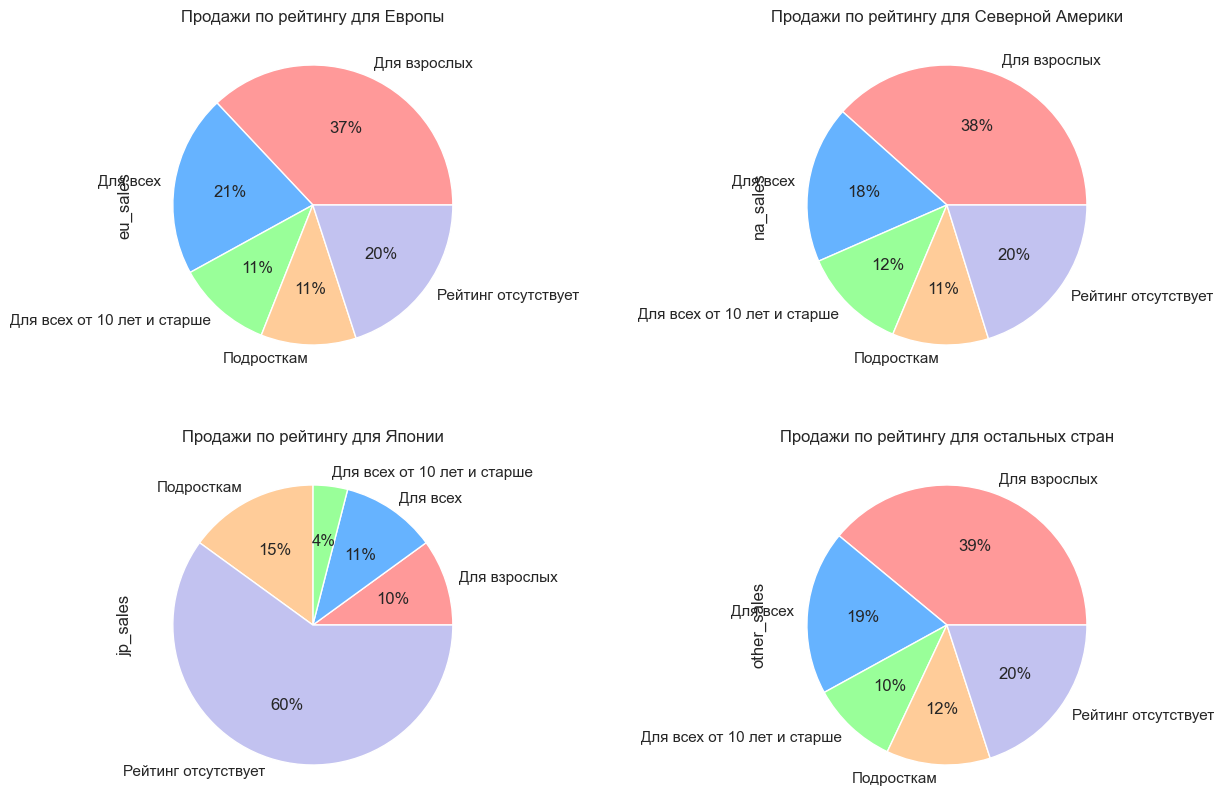

In [77]:
# Создадим поддиаграммы (subplots) в виде матрицы 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Задаем цвета для круговых диаграмм
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Построим круговую диаграмму для 'eu_sales' в первой поддиаграмме
rating_regions['eu_sales'].plot(kind='pie', autopct='%1.0f%%', ax=axs[0, 0], colors=colors)
axs[0, 0].set_title('Продажи по рейтингу для Европы')

# Построим круговую диаграмму для 'na_sales' во второй поддиаграмме
rating_regions['na_sales'].plot(kind='pie', autopct='%1.0f%%', ax=axs[0, 1], colors=colors)
axs[0, 1].set_title('Продажи по рейтингу для Северной Америки')

# Построим круговую диаграмму для 'jp_sales' в третьей поддиаграмме
rating_regions['jp_sales'].plot(kind='pie', autopct='%1.0f%%', ax=axs[1, 0], colors=colors)
axs[1, 0].set_title('Продажи по рейтингу для Японии')

# Построим круговую диаграмму для 'other_sales' в четвертой поддиаграмме
rating_regions['other_sales'].plot(kind='pie', autopct='%1.0f%%', ax=axs[1, 1], colors=colors)
axs[1, 1].set_title('Продажи по рейтингу для остальных стран')

plt.show()

**Вывод:**

- Европа, Америка и другие страны больше всего покупают игры в категории "Для взрослых", возможно это связано с тем, что эта возрастная категория самая платежеспособная.
- В Японии больше всех продаж приходится на игры "Без рейтинга", возможно в Японии дейтсвует своя система присвоения рейтинга

#### 5. Проверка гипотез

###### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [78]:
data_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,Для взрослых,21.05
7790,Fighter Within,XOne,2013,Fighting,0.11,0.07,0.00,0.02,23.0,3.0,T,Подросткам,0.20
7802,Kamen Rider: Battride War,PS3,2013,Action,0.00,0.00,0.19,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.19
7859,Injustice: Gods Among Us,WiiU,2013,Fighting,0.09,0.08,0.00,0.02,82.0,7.9,T,Подросткам,0.19
7873,Metro: Last Light,PC,2013,Action,0.06,0.11,0.00,0.02,82.0,8.6,M,Для взрослых,0.19


In [79]:
# Сделаем срезы по платформам XOne и PC 

xone = data_act[data_act['platform'] == 'XOne']
pc = data_act[data_act['platform'] == 'PC']

In [80]:
xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions,total_sales
7790,Fighter Within,XOne,2013,Fighting,0.11,0.07,0.0,0.02,23.0,3.0,T,Подросткам,0.20
7579,NBA Live 14,XOne,2013,Sports,0.16,0.02,0.0,0.02,36.0,3.1,E,Для всех,0.20
8607,Angry Birds Star Wars,XOne,2013,Strategy,0.11,0.04,0.0,0.02,53.0,6.9,E,Для всех,0.17
4274,Just Dance 2014,XOne,2013,Misc,0.30,0.11,0.0,0.04,71.0,7.0,E10+,Для всех от 10 лет и старше,0.45
6878,Zumba Fitness: World Party,XOne,2013,Misc,0.17,0.05,0.0,0.02,73.0,6.2,E,Для всех,0.24


In [81]:
pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions,total_sales
7873,Metro: Last Light,PC,2013,Action,0.06,0.11,0.0,0.02,82.0,8.6,M,Для взрослых,0.19
7915,Tom Clancy's Splinter Cell: Blacklist,PC,2013,Action,0.04,0.13,0.0,0.01,82.0,7.4,M,Для взрослых,0.18
7955,Saints Row IV,PC,2013,Action,0.11,0.06,0.0,0.02,86.0,7.4,M,Для взрослых,0.19
8119,Aliens: Colonial Marines,PC,2013,Shooter,0.10,0.06,0.0,0.02,45.0,3.5,M,Для взрослых,0.18
7466,Defiance,PC,2013,Shooter,0.14,0.04,0.0,0.02,64.0,6.5,M,Для взрослых,0.20


In [82]:
xone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 7790 to 13384
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 247 non-null    object  
 1   platform             247 non-null    object  
 2   year_of_release      247 non-null    int64   
 3   genre                247 non-null    object  
 4   na_sales             247 non-null    float64 
 5   eu_sales             247 non-null    float64 
 6   jp_sales             247 non-null    float64 
 7   other_sales          247 non-null    float64 
 8   critic_score         169 non-null    float64 
 9   user_score           182 non-null    float64 
 10  rating               247 non-null    category
 11  rating_descriptions  247 non-null    object  
 12  total_sales          247 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 25.7+ KB


In [83]:
xone = xone.dropna(subset = ['user_score'])
xone['user_score'].isna().sum()


0

In [84]:
xone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 7790 to 13384
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 182 non-null    object  
 1   platform             182 non-null    object  
 2   year_of_release      182 non-null    int64   
 3   genre                182 non-null    object  
 4   na_sales             182 non-null    float64 
 5   eu_sales             182 non-null    float64 
 6   jp_sales             182 non-null    float64 
 7   other_sales          182 non-null    float64 
 8   critic_score         165 non-null    float64 
 9   user_score           182 non-null    float64 
 10  rating               182 non-null    category
 11  rating_descriptions  182 non-null    object  
 12  total_sales          182 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 19.0+ KB


In [85]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 7873 to 13535
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 189 non-null    object  
 1   platform             189 non-null    object  
 2   year_of_release      189 non-null    int64   
 3   genre                189 non-null    object  
 4   na_sales             189 non-null    float64 
 5   eu_sales             189 non-null    float64 
 6   jp_sales             189 non-null    float64 
 7   other_sales          189 non-null    float64 
 8   critic_score         149 non-null    float64 
 9   user_score           155 non-null    float64 
 10  rating               189 non-null    category
 11  rating_descriptions  189 non-null    object  
 12  total_sales          189 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 19.7+ KB


In [86]:
pc = pc.dropna(subset = ['user_score'])
pc['user_score'].isna().sum()


0

In [87]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 7873 to 13535
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 155 non-null    object  
 1   platform             155 non-null    object  
 2   year_of_release      155 non-null    int64   
 3   genre                155 non-null    object  
 4   na_sales             155 non-null    float64 
 5   eu_sales             155 non-null    float64 
 6   jp_sales             155 non-null    float64 
 7   other_sales          155 non-null    float64 
 8   critic_score         148 non-null    float64 
 9   user_score           155 non-null    float64 
 10  rating               155 non-null    category
 11  rating_descriptions  155 non-null    object  
 12  total_sales          155 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 16.3+ KB


**Сформулируем гипотезы:**

- H0 : средний пользовательский рейтинг **xbox['user_score']** и средний пользовательский рейтинг **pc['user_score']** равны
- H1 : средний пользовательский рейтинг **xbox['user_score']** и средний пользовательский рейтинг **pc['user_score']** отличаются

**Гипотеза двухсторонняя**

In [88]:
## Проверим гипотезу

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние рейтинги различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние рейтинги не различаются.') 

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу: средние рейтинги не различаются.


**Вывод**

Мы проверили гипотезу о равенстве средних пользовательских рейтингов для двух платформ: Xbox и PC.

Мы использовали двухсторонний t-тест для независимых выборок.

Мы взяли две выборки - пользовательские рейтинги на Xbox One и PC. Затем использовали функцию ttest_ind из модуля scipy.stats для расчета t-статистики и p-значения и параметр equal_var=False, т.к. есть сомнения по равнозначности выборок. Если p-значение (p_value) меньше выбранного уровня значимости (alpha), то мы отвергаем основную гипотезу и делаем вывод о различии средних рейтингов на Xbox One и PC. В противном случае, если p-значение больше или равно alpha, то у нас нет достаточных доказательств для отвержения основной гипотезы и мы не можем сделать вывод о различии рейтингов на двух платформах.

По результатам теста p-значение равно 0.1475959401343032. Мы приняли уровень значимости (alpha = 0.05 (5%)). Поскольку p-значение (0.1475) > alpha, мы принимаем нулевую гипотезу и говорим, что "не получилось отвергнуть нулевую гипотезу".

Расшифровка результата: нет статистически значимых доказательств в пользу различия средних пользовательских рейтингов для Xbox и PC.



##### 5.2 Средние пользовательские рейтинги жанров Action и Sports  разные

In [89]:
# Сделаем срезы по жанрам Action и Sports

action = data_act[data_act['genre'] == 'Action']
sports = data_act[data_act['genre'] == 'Sports']

In [90]:
action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,Для взрослых,21.05
7802,Kamen Rider: Battride War,PS3,2013,Action,0.00,0.00,0.19,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.19
7873,Metro: Last Light,PC,2013,Action,0.06,0.11,0.00,0.02,82.0,8.6,M,Для взрослых,0.19
7876,Resident Evil: Revelations,WiiU,2013,Action,0.07,0.07,0.03,0.01,80.0,7.5,M,Для взрослых,0.18
7915,Tom Clancy's Splinter Cell: Blacklist,PC,2013,Action,0.04,0.13,0.00,0.01,82.0,7.4,M,Для взрослых,0.18


In [91]:
sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_descriptions,total_sales
7875,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E,Для всех,0.19
7647,Pro Yaky? Spirits 2013,PSP,2013,Sports,0.00,0.00,0.20,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.20
7636,Pro Yaky? Spirits 2013,PS3,2013,Sports,0.00,0.00,0.20,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.20
7579,NBA Live 14,XOne,2013,Sports,0.16,0.02,0.00,0.02,36.0,3.1,E,Для всех,0.20
8334,Jikkyou Powerful Pro Yakyuu 2013,PSP,2013,Sports,0.00,0.00,0.17,0.00,NaN,NaN,no_rating,Рейтинг отсутствует,0.17


In [92]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 16 to 5317
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 766 non-null    object  
 1   platform             766 non-null    object  
 2   year_of_release      766 non-null    int64   
 3   genre                766 non-null    object  
 4   na_sales             766 non-null    float64 
 5   eu_sales             766 non-null    float64 
 6   jp_sales             766 non-null    float64 
 7   other_sales          766 non-null    float64 
 8   critic_score         313 non-null    float64 
 9   user_score           389 non-null    float64 
 10  rating               766 non-null    category
 11  rating_descriptions  766 non-null    object  
 12  total_sales          766 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 78.9+ KB


In [93]:
# Удалим пропуски в user_score

action = action.dropna(subset = ['user_score'])
action['user_score'].isna().sum()


0

In [94]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 16 to 5317
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 389 non-null    object  
 1   platform             389 non-null    object  
 2   year_of_release      389 non-null    int64   
 3   genre                389 non-null    object  
 4   na_sales             389 non-null    float64 
 5   eu_sales             389 non-null    float64 
 6   jp_sales             389 non-null    float64 
 7   other_sales          389 non-null    float64 
 8   critic_score         309 non-null    float64 
 9   user_score           389 non-null    float64 
 10  rating               389 non-null    category
 11  rating_descriptions  389 non-null    object  
 12  total_sales          389 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 40.3+ KB


In [95]:
action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [96]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 7875 to 13384
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 214 non-null    object  
 1   platform             214 non-null    object  
 2   year_of_release      214 non-null    int64   
 3   genre                214 non-null    object  
 4   na_sales             214 non-null    float64 
 5   eu_sales             214 non-null    float64 
 6   jp_sales             214 non-null    float64 
 7   other_sales          214 non-null    float64 
 8   critic_score         112 non-null    float64 
 9   user_score           160 non-null    float64 
 10  rating               214 non-null    category
 11  rating_descriptions  214 non-null    object  
 12  total_sales          214 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 22.3+ KB


In [97]:
# Удалим пропуски в user_score

sports = sports.dropna(subset = ['user_score'])
sports['user_score'].isna().sum()

0

In [98]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 7875 to 13384
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 160 non-null    object  
 1   platform             160 non-null    object  
 2   year_of_release      160 non-null    int64   
 3   genre                160 non-null    object  
 4   na_sales             160 non-null    float64 
 5   eu_sales             160 non-null    float64 
 6   jp_sales             160 non-null    float64 
 7   other_sales          160 non-null    float64 
 8   critic_score         110 non-null    float64 
 9   user_score           160 non-null    float64 
 10  rating               160 non-null    category
 11  rating_descriptions  160 non-null    object  
 12  total_sales          160 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 16.8+ KB


In [99]:
sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

**Сформулируем гипотезы:**

- H0 : средний пользовательский рейтинг **action['user_score']** и средний пользовательский рейтинг **sports['user_score']** равны
- H1 : средний пользовательский рейтинг **action['user_score']** и средний пользовательский рейтинг **sports['user_score']** отличаются

**Гипотеза двухсторонняя**

In [100]:
## Проверим гипотезу

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние рейтинги отличаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние рейтинги не отличаются.') 

p-значение: 1.4460039700704938e-20
Отвергаем нулевую гипотезу: средние рейтинги отличаются


**Вывод**:

Для проверки этих гипотез мы использовали двухвыборочный t-тест для независимых выборок. Этот тест был выбран, так как он подходит для сравнения средних значений двух групп, при условии, что данные в обеих группах имеют нормальное распределение и одинаковую дисперсию.

Результаты теста показали, что p-значение (4.725813113246647e-19) значительно меньше уровня статистической значимости (alpha = 0.05). Следовательно, мы отвергли нулевую гипотезу о равенстве средних пользовательских рейтингов в жанрах Action и Sports. Это свидетельствует о том, что у нас есть статистически значимые доказательства различия между средними пользовательскими рейтингами в этих двух жанрах.

Результат теста позволяет сделать вывод о статистической разнице между средними пользовательскими рейтингами в жанрах Action и Sports.

**ОБЩИЙ ВЫВОД**


- Динамика продаж игр по годам:

Наибольшие продажи игр были в период с 2005 по 2011 год, что, вероятно, связано с ростом популярности и расширением рынка видеоигр.
В целом, продажи игр с 1995 по 2015 год имеют нормальное распределение, при этом средний срок жизни платформы составляет примерно 10 лет.

- Анализ актуального периода (2013-2016 годы):

Платформы PS4 и XOne в начале актуального периода показывают рост, но затем наблюдается снижение продаж, вероятно это связано с тем, что данные за 2016 год неполные
PS3 и X360 резко падают, в то время как 3DS, WiiU и PC плавно уменьшают свои продажи.
Медианные значения продаж на всех платформах смещены к нижнему краю, что может указывать на большое количество игр с небольшими продажами.

- Корреляция между отзывами и продажами:

Существует положительная линейная связь между отзывами пользователей и объемом продаж, хотя коэффициент корреляции не очень высокий.
Вероятно, отзывы пользователей не являются основным фактором влияния на общие продажи на данной платформе.
Корреляция между отзывами критиков и объемам продаж выше, что говорит о том, чт оценки критиков силнее влияют на продажи.

- Популярные жанры:

Жанр Action лидирует по продажам, за ним идут Sports, Role-Playing и Shooter.
Adventure, Strategy и Puzzle имеют меньшую популярность и ниже продажи.

- Региональные различия:

Европейские и американские пользователи предпочитают PS3 и PS4 и Xbox, а японские - 3DS.
В разных регионах предпочтения по жанрам различны, что может быть связано с культурными особенностями.
Различия в продажах по рейтингам возможно связаны с платежеспособностью и культурными особенностями.

Общий вывод: Ситуация на рынке видеоигр динамична, и успех игры зависит от множества факторов, включая жанр, платформу, региональные предпочтения и отзывы пользователей. При принятии решений в индустрии видеоигр важно учитывать разнообразие факторов, влияющих на успешность продукта.

**Проработка гипотез**

- Сравнение пользовательских рейтингов между Xbox и PC:

По результатам двухстороннего t-теста для независимых выборок мы не обнаружили статистически значимых различий в средних пользовательских рейтингах между Xbox One и PC.
P-значение (0.1475) оказалось больше выбранного уровня значимости (alpha = 0.05), и мы приняли нулевую гипотезу о равенстве средних пользовательских рейтингов на двух платформах.

- Сравнение средних пользовательских рейтингов в жанрах Action и Sports:

В отличие от сравнения платформ, результаты теста для жанров Action и Sports показали статистически значимые различия.
P-значение (4.725813113246647e-19) оказалось значительно меньше уровня статистической значимости (alpha = 0.05), что позволяет отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов в этих двух жанрах.

*Вывод по гипотезам:*

Различия в средних пользовательских рейтингах между Xbox One и PC не являются статистически значимыми.
В тоже время, существуют статистически значимые различия в средних пользовательских рейтингах между жанрами Action и Sports.
Эти результаты могут быть полезны для принятия решений в индустрии видеоигр, особенно при планировании выпуска игр на разные платформы или в различных жанрах.


**РЕКОМЕНДАЦИИ на 2017 год**

На основе предоставленных данных и результатов проведенных тестов, можно предложить следующие рекомендации для бизнеса в индустрии видеоигр:

- Платформы и жанры:

Уделяйте внимание разработке и продвижению игр на платформах PS4 и Xbox One, так как они показали стабильные продажи и имеют большую аудиторию.
При создании игр обратите внимание на популярные жанры, такие как Action, Sports, и Shooter, которые имеют высокие продажи. Однако, не забывайте о жанрах, которые могут быть востребованы в определенных регионах, так как предпочтения могут различаться.

- Отзывы пользователей:

Несмотря на отсутствие статистически значимых различий в пользовательских рейтингах между Xbox и PC, следите за обратной связью и реакцией пользователей на ваши игры. Позитивные отзывы могут существенно повысить успех игры.

- Реклама и маркетинг:

Уделяйте внимание региональным особенностям в предпочтениях игроков при разработке маркетинговых стратегий.
Сосредотачивайте усилия на продвижении игр в жанрах Action и Sports, так как они пользуются большей популярностью.

- Стратегия выпуска:

Принимайте во внимание жизненный цикл платформ. При разработке новых игр учитывайте текущие тренды и ориентируйтесь на платформы с актуальным интересом пользователей.

